# Assignment 3.3

# Image Caption Retrieval Model

### 1. Data preprocessing

We will use Microsoft COCO (Common Objects in Context) data set to train our "Image Caption Retrieval Model". This data set consists of pretrained 10-crop VGG19 features (Neural codes) and its corresponding text caption. 


In [0]:
from __future__ import print_function

import os
import sys
import numpy as np
import pandas as pd
from collections import OrderedDict

DATA_PATH = 'img_cap_coco' #(If Google colab)
#DATA_PATH = 'data' #(If local)
EMBEDDING_PATH = 'embeddings'
MODEL_PATH = 'models'

You will need to create above directories and locate data set provided in directory 'data'

In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!wget https://storage.googleapis.com/trl_data/img_cap_coco.zip
!wget http://images.cocodataset.org/zips/val2014.zip

--2018-04-15 09:15:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-04-15 09:15:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         83%[===============>    ] 684.24M  29.0MB/s    eta 7s     

glove.6B.zip        100%[===================>] 822.24M  38.6MB/s    in 34s     

2018-04-15 09:15:53 (24.3 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

--2018-04-15 09:15:54--  https://storage.googleapis.com/trl_data/img_cap_coco.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251061503 (239M) [application/zip]
Saving to: ‘img_cap_coco.zip’

img_cap_coco.zip    100%[===================>] 239.43M   158MB/s    in 1.5s    

2018-04-15 09:15:56 (158 MB/s) - ‘img_cap_coco.zip’ saved [251061503/251061503]

--2018-04-15 09:15:57--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request 

val2014.zip         100%[===================>]   6.19G   148MB/s    in 44s     

2018-04-15 09:16:41 (144 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [4]:
!mkdir glove6B
!mv glove.6B.zip glove6B/

!unzip glove6B/glove.6B;
!unzip img_cap_coco;
!unzip val2014;

!mv glove.6B.100d.txt glove6B/
!mv glove.6B.50d.txt glove6B/
!mv glove.6B.200d.txt glove6B/
!mv glove.6B.300d.txt glove6B/

#rm -r foldername
#rm filename
#mv oldfoldername newfoldername

Archive:  glove6B/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
Archive:  img_cap_coco.zip
   creating: img_cap_coco/
  inflating: img_cap_coco/captions_val2014.json  
  inflating: img_cap_coco/instances_val2014.json  
  inflating: img_cap_coco/test_data.npy  
  inflating: img_cap_coco/train_data.npy  
  inflating: img_cap_coco/val_data.npy  
Archive:  val2014.zip
   creating: val2014/
 extracting: val2014/COCO_val2014_000000324670.jpg  
 extracting: val2014/COCO_val2014_000000464263.jpg  
 extracting: val2014/COCO_val2014_000000526418.jpg  
 extracting: val2014/COCO_val2014_000000230593.jpg  
 extracting: val2014/COCO_val2014_000000186147.jpg  
 extracting: val2014/COCO_val2014_000000037149.jpg  
 extracting: val2014/COCO_val2014_000000284743.jpg  
 extracting: val2014/COCO_val2014_000000550691.jpg  
 extracting: val2014/COCO_val2014_000000515126.jpg  
 extracting: va


 extracting: val2014/COCO_val2014_000000441472.jpg  
 extracting: val2014/COCO_val2014_000000242946.jpg  
 extracting: val2014/COCO_val2014_000000365098.jpg  
 extracting: val2014/COCO_val2014_000000073119.jpg  
 extracting: val2014/COCO_val2014_000000417400.jpg  
 extracting: val2014/COCO_val2014_000000507547.jpg  
 extracting: val2014/COCO_val2014_000000490620.jpg  
 extracting: val2014/COCO_val2014_000000492647.jpg  
 extracting: val2014/COCO_val2014_000000451431.jpg  
 extracting: val2014/COCO_val2014_000000452767.jpg  
 extracting: val2014/COCO_val2014_000000074860.jpg  
 extracting: val2014/COCO_val2014_000000324436.jpg  
 extracting: val2014/COCO_val2014_000000061316.jpg  
 extracting: val2014/COCO_val2014_000000337899.jpg  
 extracting: val2014/COCO_val2014_000000489588.jpg  
 extracting: val2014/COCO_val2014_000000240565.jpg  
 extracting: val2014/COCO_val2014_000000101862.jpg  
 extracting: val2014/COCO_val2014_000000251801.jpg  
 extracting: val2014/COCO_val2014_00000001020


 extracting: val2014/COCO_val2014_000000291179.jpg  
 extracting: val2014/COCO_val2014_000000539636.jpg  
 extracting: val2014/COCO_val2014_000000138653.jpg  
 extracting: val2014/COCO_val2014_000000088462.jpg  
 extracting: val2014/COCO_val2014_000000242940.jpg  
 extracting: val2014/COCO_val2014_000000030998.jpg  
 extracting: val2014/COCO_val2014_000000537802.jpg  
 extracting: val2014/COCO_val2014_000000153445.jpg  
 extracting: val2014/COCO_val2014_000000133827.jpg  
 extracting: val2014/COCO_val2014_000000566027.jpg  
 extracting: val2014/COCO_val2014_000000300701.jpg  
 extracting: val2014/COCO_val2014_000000519338.jpg  
 extracting: val2014/COCO_val2014_000000272212.jpg  
 extracting: val2014/COCO_val2014_000000358389.jpg  
 extracting: val2014/COCO_val2014_000000111702.jpg  
 extracting: val2014/COCO_val2014_000000487957.jpg  
 extracting: val2014/COCO_val2014_000000190227.jpg  
 extracting: val2014/COCO_val2014_000000193369.jpg  
 extracting: val2014/COCO_val2014_00000002266


 extracting: val2014/COCO_val2014_000000394322.jpg  
 extracting: val2014/COCO_val2014_000000368196.jpg  
 extracting: val2014/COCO_val2014_000000125524.jpg  
 extracting: val2014/COCO_val2014_000000209035.jpg  
 extracting: val2014/COCO_val2014_000000558673.jpg  
 extracting: val2014/COCO_val2014_000000143926.jpg  
 extracting: val2014/COCO_val2014_000000034080.jpg  
 extracting: val2014/COCO_val2014_000000377060.jpg  
 extracting: val2014/COCO_val2014_000000560721.jpg  
 extracting: val2014/COCO_val2014_000000304342.jpg  
 extracting: val2014/COCO_val2014_000000264423.jpg  
 extracting: val2014/COCO_val2014_000000346717.jpg  
 extracting: val2014/COCO_val2014_000000486203.jpg  
 extracting: val2014/COCO_val2014_000000421009.jpg  
 extracting: val2014/COCO_val2014_000000273132.jpg  
 extracting: val2014/COCO_val2014_000000119194.jpg  
 extracting: val2014/COCO_val2014_000000277174.jpg  
 extracting: val2014/COCO_val2014_000000442761.jpg  
 extracting: val2014/COCO_val2014_00000008590


 extracting: val2014/COCO_val2014_000000244633.jpg  
 extracting: val2014/COCO_val2014_000000056413.jpg  
 extracting: val2014/COCO_val2014_000000504415.jpg  
 extracting: val2014/COCO_val2014_000000124949.jpg  
 extracting: val2014/COCO_val2014_000000528257.jpg  
 extracting: val2014/COCO_val2014_000000018191.jpg  
 extracting: val2014/COCO_val2014_000000462213.jpg  
 extracting: val2014/COCO_val2014_000000278934.jpg  
 extracting: val2014/COCO_val2014_000000393578.jpg  
 extracting: val2014/COCO_val2014_000000047112.jpg  
 extracting: val2014/COCO_val2014_000000415768.jpg  
 extracting: val2014/COCO_val2014_000000357782.jpg  
 extracting: val2014/COCO_val2014_000000353536.jpg  
 extracting: val2014/COCO_val2014_000000084389.jpg  
 extracting: val2014/COCO_val2014_000000546052.jpg  
 extracting: val2014/COCO_val2014_000000370689.jpg  
 extracting: val2014/COCO_val2014_000000201622.jpg  
 extracting: val2014/COCO_val2014_000000442165.jpg  
 extracting: val2014/COCO_val2014_00000009519


 extracting: val2014/COCO_val2014_000000498010.jpg  
 extracting: val2014/COCO_val2014_000000066181.jpg  
 extracting: val2014/COCO_val2014_000000509855.jpg  
 extracting: val2014/COCO_val2014_000000488710.jpg  
 extracting: val2014/COCO_val2014_000000268254.jpg  
 extracting: val2014/COCO_val2014_000000489909.jpg  
 extracting: val2014/COCO_val2014_000000336340.jpg  
 extracting: val2014/COCO_val2014_000000229659.jpg  
 extracting: val2014/COCO_val2014_000000047149.jpg  
 extracting: val2014/COCO_val2014_000000172006.jpg  
 extracting: val2014/COCO_val2014_000000458953.jpg  
 extracting: val2014/COCO_val2014_000000303778.jpg  
 extracting: val2014/COCO_val2014_000000273354.jpg  
 extracting: val2014/COCO_val2014_000000455355.jpg  
 extracting: val2014/COCO_val2014_000000156759.jpg  
 extracting: val2014/COCO_val2014_000000179187.jpg  
 extracting: val2014/COCO_val2014_000000371472.jpg  
 extracting: val2014/COCO_val2014_000000382848.jpg  
 extracting: val2014/COCO_val2014_00000032197

 extracting: val2014/COCO_val2014_000000530494.jpg  
 extracting: val2014/COCO_val2014_000000217269.jpg  
 extracting: val2014/COCO_val2014_000000038083.jpg  
 extracting: val2014/COCO_val2014_000000347172.jpg  
 extracting: val2014/COCO_val2014_000000254732.jpg  
 extracting: val2014/COCO_val2014_000000016360.jpg  
 extracting: val2014/COCO_val2014_000000402027.jpg  
 extracting: val2014/COCO_val2014_000000099794.jpg  
 extracting: val2014/COCO_val2014_000000306536.jpg  
 extracting: val2014/COCO_val2014_000000507782.jpg  
 extracting: val2014/COCO_val2014_000000176211.jpg  
 extracting: val2014/COCO_val2014_000000512394.jpg  
 extracting: val2014/COCO_val2014_000000513968.jpg  
 extracting: val2014/COCO_val2014_000000580972.jpg  
 extracting: val2014/COCO_val2014_000000417111.jpg  
 extracting: val2014/COCO_val2014_000000244575.jpg  
 extracting: val2014/COCO_val2014_000000455188.jpg  
 extracting: val2014/COCO_val2014_000000318778.jpg  
 extracting: val2014/COCO_val2014_000000402588


 extracting: val2014/COCO_val2014_000000129175.jpg  
 extracting: val2014/COCO_val2014_000000220764.jpg  
 extracting: val2014/COCO_val2014_000000413616.jpg  
 extracting: val2014/COCO_val2014_000000216790.jpg  
 extracting: val2014/COCO_val2014_000000485123.jpg  
 extracting: val2014/COCO_val2014_000000466085.jpg  
 extracting: val2014/COCO_val2014_000000303320.jpg  
 extracting: val2014/COCO_val2014_000000411774.jpg  
 extracting: val2014/COCO_val2014_000000431954.jpg  
 extracting: val2014/COCO_val2014_000000563267.jpg  
 extracting: val2014/COCO_val2014_000000184902.jpg  
 extracting: val2014/COCO_val2014_000000229385.jpg  
 extracting: val2014/COCO_val2014_000000284445.jpg  
 extracting: val2014/COCO_val2014_000000467599.jpg  
 extracting: val2014/COCO_val2014_000000040881.jpg  
 extracting: val2014/COCO_val2014_000000319647.jpg  
 extracting: val2014/COCO_val2014_000000111341.jpg  
 extracting: val2014/COCO_val2014_000000442245.jpg  
 extracting: val2014/COCO_val2014_00000043261


 extracting: val2014/COCO_val2014_000000405188.jpg  
 extracting: val2014/COCO_val2014_000000178331.jpg  
 extracting: val2014/COCO_val2014_000000082836.jpg  
 extracting: val2014/COCO_val2014_000000219075.jpg  
 extracting: val2014/COCO_val2014_000000180366.jpg  
 extracting: val2014/COCO_val2014_000000209388.jpg  
 extracting: val2014/COCO_val2014_000000454956.jpg  
 extracting: val2014/COCO_val2014_000000036230.jpg  
 extracting: val2014/COCO_val2014_000000565012.jpg  
 extracting: val2014/COCO_val2014_000000575356.jpg  
 extracting: val2014/COCO_val2014_000000030290.jpg  
 extracting: val2014/COCO_val2014_000000455480.jpg  
 extracting: val2014/COCO_val2014_000000374115.jpg  
 extracting: val2014/COCO_val2014_000000080517.jpg  
 extracting: val2014/COCO_val2014_000000272566.jpg  
 extracting: val2014/COCO_val2014_000000520531.jpg  
 extracting: val2014/COCO_val2014_000000558558.jpg  
 extracting: val2014/COCO_val2014_000000090754.jpg  
 extracting: val2014/COCO_val2014_00000008139


 extracting: val2014/COCO_val2014_000000288062.jpg  
 extracting: val2014/COCO_val2014_000000019904.jpg  
 extracting: val2014/COCO_val2014_000000175994.jpg  
 extracting: val2014/COCO_val2014_000000213693.jpg  
 extracting: val2014/COCO_val2014_000000509423.jpg  
 extracting: val2014/COCO_val2014_000000337498.jpg  
 extracting: val2014/COCO_val2014_000000326086.jpg  
 extracting: val2014/COCO_val2014_000000522813.jpg  
 extracting: val2014/COCO_val2014_000000149622.jpg  
 extracting: val2014/COCO_val2014_000000045467.jpg  
 extracting: val2014/COCO_val2014_000000464312.jpg  
 extracting: val2014/COCO_val2014_000000215867.jpg  
 extracting: val2014/COCO_val2014_000000314388.jpg  
 extracting: val2014/COCO_val2014_000000327771.jpg  
 extracting: val2014/COCO_val2014_000000014733.jpg  
 extracting: val2014/COCO_val2014_000000356394.jpg  
 extracting: val2014/COCO_val2014_000000348140.jpg  
 extracting: val2014/COCO_val2014_000000374641.jpg  
 extracting: val2014/COCO_val2014_00000054210


 extracting: val2014/COCO_val2014_000000266892.jpg  
 extracting: val2014/COCO_val2014_000000044860.jpg  
 extracting: val2014/COCO_val2014_000000322968.jpg  
 extracting: val2014/COCO_val2014_000000506441.jpg  
 extracting: val2014/COCO_val2014_000000407945.jpg  
 extracting: val2014/COCO_val2014_000000503255.jpg  
 extracting: val2014/COCO_val2014_000000554328.jpg  
 extracting: val2014/COCO_val2014_000000116206.jpg  
 extracting: val2014/COCO_val2014_000000176149.jpg  
 extracting: val2014/COCO_val2014_000000332058.jpg  
 extracting: val2014/COCO_val2014_000000318361.jpg  
 extracting: val2014/COCO_val2014_000000433460.jpg  
 extracting: val2014/COCO_val2014_000000137844.jpg  
 extracting: val2014/COCO_val2014_000000171546.jpg  
 extracting: val2014/COCO_val2014_000000389401.jpg  
 extracting: val2014/COCO_val2014_000000232610.jpg  
 extracting: val2014/COCO_val2014_000000458549.jpg  
 extracting: val2014/COCO_val2014_000000067995.jpg  
 extracting: val2014/COCO_val2014_00000006852


 extracting: val2014/COCO_val2014_000000475923.jpg  
 extracting: val2014/COCO_val2014_000000385036.jpg  
 extracting: val2014/COCO_val2014_000000006662.jpg  
 extracting: val2014/COCO_val2014_000000320554.jpg  
 extracting: val2014/COCO_val2014_000000276476.jpg  
 extracting: val2014/COCO_val2014_000000087588.jpg  
 extracting: val2014/COCO_val2014_000000427306.jpg  
 extracting: val2014/COCO_val2014_000000021147.jpg  
 extracting: val2014/COCO_val2014_000000469294.jpg  
 extracting: val2014/COCO_val2014_000000312237.jpg  
 extracting: val2014/COCO_val2014_000000510395.jpg  
 extracting: val2014/COCO_val2014_000000461130.jpg  
 extracting: val2014/COCO_val2014_000000013867.jpg  
 extracting: val2014/COCO_val2014_000000010844.jpg  
 extracting: val2014/COCO_val2014_000000292995.jpg  
 extracting: val2014/COCO_val2014_000000327177.jpg  
 extracting: val2014/COCO_val2014_000000253767.jpg  
 extracting: val2014/COCO_val2014_000000342377.jpg  
 extracting: val2014/COCO_val2014_00000021821


 extracting: val2014/COCO_val2014_000000418346.jpg  
 extracting: val2014/COCO_val2014_000000511241.jpg  
 extracting: val2014/COCO_val2014_000000360611.jpg  
 extracting: val2014/COCO_val2014_000000063950.jpg  
 extracting: val2014/COCO_val2014_000000013031.jpg  
 extracting: val2014/COCO_val2014_000000150558.jpg  
 extracting: val2014/COCO_val2014_000000205239.jpg  
 extracting: val2014/COCO_val2014_000000420878.jpg  
 extracting: val2014/COCO_val2014_000000267694.jpg  
 extracting: val2014/COCO_val2014_000000236323.jpg  
 extracting: val2014/COCO_val2014_000000057415.jpg  
 extracting: val2014/COCO_val2014_000000516248.jpg  
 extracting: val2014/COCO_val2014_000000276239.jpg  
 extracting: val2014/COCO_val2014_000000373857.jpg  
 extracting: val2014/COCO_val2014_000000506052.jpg  
 extracting: val2014/COCO_val2014_000000210749.jpg  
 extracting: val2014/COCO_val2014_000000248314.jpg  
 extracting: val2014/COCO_val2014_000000105655.jpg  
 extracting: val2014/COCO_val2014_00000024566


 extracting: val2014/COCO_val2014_000000042970.jpg  
 extracting: val2014/COCO_val2014_000000558633.jpg  
 extracting: val2014/COCO_val2014_000000138550.jpg  
 extracting: val2014/COCO_val2014_000000451511.jpg  
 extracting: val2014/COCO_val2014_000000187979.jpg  
 extracting: val2014/COCO_val2014_000000067532.jpg  
 extracting: val2014/COCO_val2014_000000012897.jpg  
 extracting: val2014/COCO_val2014_000000571008.jpg  
 extracting: val2014/COCO_val2014_000000236123.jpg  
 extracting: val2014/COCO_val2014_000000180798.jpg  
 extracting: val2014/COCO_val2014_000000236868.jpg  
 extracting: val2014/COCO_val2014_000000120792.jpg  
 extracting: val2014/COCO_val2014_000000178761.jpg  
 extracting: val2014/COCO_val2014_000000174888.jpg  
 extracting: val2014/COCO_val2014_000000295420.jpg  
 extracting: val2014/COCO_val2014_000000013597.jpg  
 extracting: val2014/COCO_val2014_000000105177.jpg  
 extracting: val2014/COCO_val2014_000000168804.jpg  
 extracting: val2014/COCO_val2014_00000026555

 extracting: val2014/COCO_val2014_000000389410.jpg  
 extracting: val2014/COCO_val2014_000000307611.jpg  
 extracting: val2014/COCO_val2014_000000553165.jpg  
 extracting: val2014/COCO_val2014_000000023709.jpg  
 extracting: val2014/COCO_val2014_000000439902.jpg  
 extracting: val2014/COCO_val2014_000000558661.jpg  
 extracting: val2014/COCO_val2014_000000325593.jpg  
 extracting: val2014/COCO_val2014_000000258905.jpg  
 extracting: val2014/COCO_val2014_000000146825.jpg  
 extracting: val2014/COCO_val2014_000000259408.jpg  
 extracting: val2014/COCO_val2014_000000473994.jpg  
 extracting: val2014/COCO_val2014_000000370138.jpg  
 extracting: val2014/COCO_val2014_000000436795.jpg  
 extracting: val2014/COCO_val2014_000000307057.jpg  
 extracting: val2014/COCO_val2014_000000339266.jpg  
 extracting: val2014/COCO_val2014_000000269017.jpg  
 extracting: val2014/COCO_val2014_000000520979.jpg  
 extracting: val2014/COCO_val2014_000000173932.jpg  
 extracting: val2014/COCO_val2014_000000445248

 extracting: val2014/COCO_val2014_000000159609.jpg  
 extracting: val2014/COCO_val2014_000000160872.jpg  
 extracting: val2014/COCO_val2014_000000297299.jpg  
 extracting: val2014/COCO_val2014_000000435081.jpg  
 extracting: val2014/COCO_val2014_000000362219.jpg  
 extracting: val2014/COCO_val2014_000000381639.jpg  
 extracting: val2014/COCO_val2014_000000495626.jpg  
 extracting: val2014/COCO_val2014_000000439180.jpg  
 extracting: val2014/COCO_val2014_000000145325.jpg  
 extracting: val2014/COCO_val2014_000000361341.jpg  
 extracting: val2014/COCO_val2014_000000237764.jpg  
 extracting: val2014/COCO_val2014_000000290026.jpg  
 extracting: val2014/COCO_val2014_000000209901.jpg  
 extracting: val2014/COCO_val2014_000000440706.jpg  
 extracting: val2014/COCO_val2014_000000301926.jpg  
 extracting: val2014/COCO_val2014_000000247782.jpg  
 extracting: val2014/COCO_val2014_000000110951.jpg  
 extracting: val2014/COCO_val2014_000000220221.jpg  
 extracting: val2014/COCO_val2014_000000205333

 extracting: val2014/COCO_val2014_000000428830.jpg  
 extracting: val2014/COCO_val2014_000000452558.jpg  
 extracting: val2014/COCO_val2014_000000079213.jpg  
 extracting: val2014/COCO_val2014_000000237558.jpg  
 extracting: val2014/COCO_val2014_000000571970.jpg  
 extracting: val2014/COCO_val2014_000000224647.jpg  
 extracting: val2014/COCO_val2014_000000435957.jpg  
 extracting: val2014/COCO_val2014_000000506628.jpg  
 extracting: val2014/COCO_val2014_000000170716.jpg  
 extracting: val2014/COCO_val2014_000000224523.jpg  
 extracting: val2014/COCO_val2014_000000416991.jpg  
 extracting: val2014/COCO_val2014_000000147338.jpg  
 extracting: val2014/COCO_val2014_000000009679.jpg  
 extracting: val2014/COCO_val2014_000000196664.jpg  
 extracting: val2014/COCO_val2014_000000102644.jpg  
 extracting: val2014/COCO_val2014_000000485269.jpg  
 extracting: val2014/COCO_val2014_000000419978.jpg  
 extracting: val2014/COCO_val2014_000000264497.jpg  
 extracting: val2014/COCO_val2014_000000044612


 extracting: val2014/COCO_val2014_000000285614.jpg  
 extracting: val2014/COCO_val2014_000000193015.jpg  
 extracting: val2014/COCO_val2014_000000171317.jpg  
 extracting: val2014/COCO_val2014_000000112572.jpg  
 extracting: val2014/COCO_val2014_000000237758.jpg  
 extracting: val2014/COCO_val2014_000000085316.jpg  
 extracting: val2014/COCO_val2014_000000442463.jpg  
 extracting: val2014/COCO_val2014_000000527631.jpg  
 extracting: val2014/COCO_val2014_000000330439.jpg  
 extracting: val2014/COCO_val2014_000000472569.jpg  
 extracting: val2014/COCO_val2014_000000117535.jpg  
 extracting: val2014/COCO_val2014_000000112298.jpg  
 extracting: val2014/COCO_val2014_000000556616.jpg  
 extracting: val2014/COCO_val2014_000000040497.jpg  
 extracting: val2014/COCO_val2014_000000408859.jpg  
 extracting: val2014/COCO_val2014_000000216497.jpg  
 extracting: val2014/COCO_val2014_000000320899.jpg  
 extracting: val2014/COCO_val2014_000000408253.jpg  
 extracting: val2014/COCO_val2014_00000008744


 extracting: val2014/COCO_val2014_000000261805.jpg  
 extracting: val2014/COCO_val2014_000000122251.jpg  
 extracting: val2014/COCO_val2014_000000285437.jpg  
 extracting: val2014/COCO_val2014_000000212292.jpg  
 extracting: val2014/COCO_val2014_000000423810.jpg  
 extracting: val2014/COCO_val2014_000000275202.jpg  
 extracting: val2014/COCO_val2014_000000284789.jpg  
 extracting: val2014/COCO_val2014_000000016466.jpg  
 extracting: val2014/COCO_val2014_000000125952.jpg  
 extracting: val2014/COCO_val2014_000000166551.jpg  
 extracting: val2014/COCO_val2014_000000356648.jpg  
 extracting: val2014/COCO_val2014_000000286813.jpg  
 extracting: val2014/COCO_val2014_000000278168.jpg  
 extracting: val2014/COCO_val2014_000000458727.jpg  
 extracting: val2014/COCO_val2014_000000382770.jpg  
 extracting: val2014/COCO_val2014_000000358195.jpg  
 extracting: val2014/COCO_val2014_000000379120.jpg  
 extracting: val2014/COCO_val2014_000000163118.jpg  
 extracting: val2014/COCO_val2014_00000044371


 extracting: val2014/COCO_val2014_000000521352.jpg  
 extracting: val2014/COCO_val2014_000000100083.jpg  
 extracting: val2014/COCO_val2014_000000389283.jpg  
 extracting: val2014/COCO_val2014_000000352789.jpg  
 extracting: val2014/COCO_val2014_000000526962.jpg  
 extracting: val2014/COCO_val2014_000000313623.jpg  
 extracting: val2014/COCO_val2014_000000508949.jpg  
 extracting: val2014/COCO_val2014_000000033131.jpg  
 extracting: val2014/COCO_val2014_000000232627.jpg  
 extracting: val2014/COCO_val2014_000000199310.jpg  
 extracting: val2014/COCO_val2014_000000079047.jpg  
 extracting: val2014/COCO_val2014_000000135029.jpg  
 extracting: val2014/COCO_val2014_000000470909.jpg  
 extracting: val2014/COCO_val2014_000000166344.jpg  
 extracting: val2014/COCO_val2014_000000001342.jpg  
 extracting: val2014/COCO_val2014_000000526675.jpg  
 extracting: val2014/COCO_val2014_000000479950.jpg  
 extracting: val2014/COCO_val2014_000000538115.jpg  
 extracting: val2014/COCO_val2014_00000013999


 extracting: val2014/COCO_val2014_000000140540.jpg  
 extracting: val2014/COCO_val2014_000000140490.jpg  
 extracting: val2014/COCO_val2014_000000085089.jpg  
 extracting: val2014/COCO_val2014_000000508218.jpg  
 extracting: val2014/COCO_val2014_000000327663.jpg  
 extracting: val2014/COCO_val2014_000000104494.jpg  
 extracting: val2014/COCO_val2014_000000427083.jpg  
 extracting: val2014/COCO_val2014_000000571196.jpg  
 extracting: val2014/COCO_val2014_000000287554.jpg  
 extracting: val2014/COCO_val2014_000000188296.jpg  
 extracting: val2014/COCO_val2014_000000143671.jpg  
 extracting: val2014/COCO_val2014_000000219216.jpg  
 extracting: val2014/COCO_val2014_000000297353.jpg  
 extracting: val2014/COCO_val2014_000000544522.jpg  
 extracting: val2014/COCO_val2014_000000390137.jpg  
 extracting: val2014/COCO_val2014_000000218678.jpg  
 extracting: val2014/COCO_val2014_000000184746.jpg  
 extracting: val2014/COCO_val2014_000000178747.jpg  
 extracting: val2014/COCO_val2014_00000042764

 extracting: val2014/COCO_val2014_000000464522.jpg  
 extracting: val2014/COCO_val2014_000000142581.jpg  
 extracting: val2014/COCO_val2014_000000157192.jpg  
 extracting: val2014/COCO_val2014_000000578344.jpg  
 extracting: val2014/COCO_val2014_000000249295.jpg  
 extracting: val2014/COCO_val2014_000000228825.jpg  
 extracting: val2014/COCO_val2014_000000234607.jpg  
 extracting: val2014/COCO_val2014_000000484614.jpg  
 extracting: val2014/COCO_val2014_000000150639.jpg  
 extracting: val2014/COCO_val2014_000000393469.jpg  
 extracting: val2014/COCO_val2014_000000203460.jpg  
 extracting: val2014/COCO_val2014_000000543644.jpg  
 extracting: val2014/COCO_val2014_000000434006.jpg  
 extracting: val2014/COCO_val2014_000000206356.jpg  
 extracting: val2014/COCO_val2014_000000122535.jpg  
 extracting: val2014/COCO_val2014_000000044652.jpg  
 extracting: val2014/COCO_val2014_000000415585.jpg  
 extracting: val2014/COCO_val2014_000000008498.jpg  
 extracting: val2014/COCO_val2014_000000356379


 extracting: val2014/COCO_val2014_000000493652.jpg  
 extracting: val2014/COCO_val2014_000000441929.jpg  
 extracting: val2014/COCO_val2014_000000440212.jpg  
 extracting: val2014/COCO_val2014_000000290602.jpg  
 extracting: val2014/COCO_val2014_000000446136.jpg  
 extracting: val2014/COCO_val2014_000000023731.jpg  
 extracting: val2014/COCO_val2014_000000144300.jpg  
 extracting: val2014/COCO_val2014_000000371241.jpg  
 extracting: val2014/COCO_val2014_000000514321.jpg  
 extracting: val2014/COCO_val2014_000000379716.jpg  
 extracting: val2014/COCO_val2014_000000279420.jpg  
 extracting: val2014/COCO_val2014_000000538891.jpg  
 extracting: val2014/COCO_val2014_000000413900.jpg  
 extracting: val2014/COCO_val2014_000000166731.jpg  
 extracting: val2014/COCO_val2014_000000555684.jpg  
 extracting: val2014/COCO_val2014_000000076082.jpg  
 extracting: val2014/COCO_val2014_000000100166.jpg  
 extracting: val2014/COCO_val2014_000000363358.jpg  
 extracting: val2014/COCO_val2014_00000057218


 extracting: val2014/COCO_val2014_000000242734.jpg  
 extracting: val2014/COCO_val2014_000000199671.jpg  
 extracting: val2014/COCO_val2014_000000446218.jpg  
 extracting: val2014/COCO_val2014_000000361124.jpg  
 extracting: val2014/COCO_val2014_000000131019.jpg  
 extracting: val2014/COCO_val2014_000000384213.jpg  
 extracting: val2014/COCO_val2014_000000409239.jpg  
 extracting: val2014/COCO_val2014_000000131527.jpg  
 extracting: val2014/COCO_val2014_000000486905.jpg  
 extracting: val2014/COCO_val2014_000000397433.jpg  
 extracting: val2014/COCO_val2014_000000034900.jpg  
 extracting: val2014/COCO_val2014_000000220858.jpg  
 extracting: val2014/COCO_val2014_000000025202.jpg  
 extracting: val2014/COCO_val2014_000000063355.jpg  
 extracting: val2014/COCO_val2014_000000081054.jpg  
 extracting: val2014/COCO_val2014_000000064240.jpg  
 extracting: val2014/COCO_val2014_000000345782.jpg  
 extracting: val2014/COCO_val2014_000000377595.jpg  
 extracting: val2014/COCO_val2014_00000005997


 extracting: val2014/COCO_val2014_000000315257.jpg  
 extracting: val2014/COCO_val2014_000000116887.jpg  
 extracting: val2014/COCO_val2014_000000200699.jpg  
 extracting: val2014/COCO_val2014_000000393768.jpg  
 extracting: val2014/COCO_val2014_000000071914.jpg  
 extracting: val2014/COCO_val2014_000000071727.jpg  
 extracting: val2014/COCO_val2014_000000500468.jpg  
 extracting: val2014/COCO_val2014_000000096251.jpg  
 extracting: val2014/COCO_val2014_000000002315.jpg  
 extracting: val2014/COCO_val2014_000000351149.jpg  
 extracting: val2014/COCO_val2014_000000548363.jpg  
 extracting: val2014/COCO_val2014_000000430871.jpg  
 extracting: val2014/COCO_val2014_000000308545.jpg  
 extracting: val2014/COCO_val2014_000000217614.jpg  
 extracting: val2014/COCO_val2014_000000461860.jpg  
 extracting: val2014/COCO_val2014_000000132702.jpg  
 extracting: val2014/COCO_val2014_000000081561.jpg  
 extracting: val2014/COCO_val2014_000000379235.jpg  
 extracting: val2014/COCO_val2014_00000051245


 extracting: val2014/COCO_val2014_000000035694.jpg  
 extracting: val2014/COCO_val2014_000000115626.jpg  
 extracting: val2014/COCO_val2014_000000132544.jpg  
 extracting: val2014/COCO_val2014_000000578092.jpg  
 extracting: val2014/COCO_val2014_000000256702.jpg  
 extracting: val2014/COCO_val2014_000000190898.jpg  
 extracting: val2014/COCO_val2014_000000001149.jpg  
 extracting: val2014/COCO_val2014_000000340398.jpg  
 extracting: val2014/COCO_val2014_000000437564.jpg  
 extracting: val2014/COCO_val2014_000000499802.jpg  
 extracting: val2014/COCO_val2014_000000559884.jpg  
 extracting: val2014/COCO_val2014_000000022724.jpg  
 extracting: val2014/COCO_val2014_000000212939.jpg  
 extracting: val2014/COCO_val2014_000000302536.jpg  
 extracting: val2014/COCO_val2014_000000252444.jpg  
 extracting: val2014/COCO_val2014_000000514437.jpg  
 extracting: val2014/COCO_val2014_000000548780.jpg  
 extracting: val2014/COCO_val2014_000000364243.jpg  
 extracting: val2014/COCO_val2014_00000048141


 extracting: val2014/COCO_val2014_000000172408.jpg  
 extracting: val2014/COCO_val2014_000000206473.jpg  
 extracting: val2014/COCO_val2014_000000517832.jpg  
 extracting: val2014/COCO_val2014_000000117061.jpg  
 extracting: val2014/COCO_val2014_000000383448.jpg  
 extracting: val2014/COCO_val2014_000000099219.jpg  
 extracting: val2014/COCO_val2014_000000446473.jpg  
 extracting: val2014/COCO_val2014_000000356298.jpg  
 extracting: val2014/COCO_val2014_000000129862.jpg  
 extracting: val2014/COCO_val2014_000000065074.jpg  
 extracting: val2014/COCO_val2014_000000520154.jpg  
 extracting: val2014/COCO_val2014_000000003771.jpg  
 extracting: val2014/COCO_val2014_000000350341.jpg  
 extracting: val2014/COCO_val2014_000000164005.jpg  
 extracting: val2014/COCO_val2014_000000021435.jpg  
 extracting: val2014/COCO_val2014_000000372300.jpg  
 extracting: val2014/COCO_val2014_000000508115.jpg  
 extracting: val2014/COCO_val2014_000000318044.jpg  
 extracting: val2014/COCO_val2014_00000038842


 extracting: val2014/COCO_val2014_000000000397.jpg  
 extracting: val2014/COCO_val2014_000000288042.jpg  
 extracting: val2014/COCO_val2014_000000442250.jpg  
 extracting: val2014/COCO_val2014_000000030066.jpg  
 extracting: val2014/COCO_val2014_000000474186.jpg  
 extracting: val2014/COCO_val2014_000000545114.jpg  
 extracting: val2014/COCO_val2014_000000239537.jpg  
 extracting: val2014/COCO_val2014_000000108425.jpg  
 extracting: val2014/COCO_val2014_000000355057.jpg  
 extracting: val2014/COCO_val2014_000000329456.jpg  
 extracting: val2014/COCO_val2014_000000150091.jpg  
 extracting: val2014/COCO_val2014_000000069494.jpg  
 extracting: val2014/COCO_val2014_000000275270.jpg  
 extracting: val2014/COCO_val2014_000000561116.jpg  
 extracting: val2014/COCO_val2014_000000131531.jpg  
 extracting: val2014/COCO_val2014_000000546444.jpg  
 extracting: val2014/COCO_val2014_000000122467.jpg  
 extracting: val2014/COCO_val2014_000000153205.jpg  
 extracting: val2014/COCO_val2014_00000014248


 extracting: val2014/COCO_val2014_000000551944.jpg  
 extracting: val2014/COCO_val2014_000000091619.jpg  
 extracting: val2014/COCO_val2014_000000456865.jpg  
 extracting: val2014/COCO_val2014_000000533434.jpg  
 extracting: val2014/COCO_val2014_000000376371.jpg  
 extracting: val2014/COCO_val2014_000000044536.jpg  
 extracting: val2014/COCO_val2014_000000128891.jpg  
 extracting: val2014/COCO_val2014_000000133928.jpg  
 extracting: val2014/COCO_val2014_000000281296.jpg  
 extracting: val2014/COCO_val2014_000000145369.jpg  
 extracting: val2014/COCO_val2014_000000403038.jpg  
 extracting: val2014/COCO_val2014_000000364399.jpg  
 extracting: val2014/COCO_val2014_000000434968.jpg  
 extracting: val2014/COCO_val2014_000000108130.jpg  
 extracting: val2014/COCO_val2014_000000450695.jpg  
 extracting: val2014/COCO_val2014_000000356800.jpg  
 extracting: val2014/COCO_val2014_000000066027.jpg  
 extracting: val2014/COCO_val2014_000000443160.jpg  
 extracting: val2014/COCO_val2014_00000043965


 extracting: val2014/COCO_val2014_000000144809.jpg  
 extracting: val2014/COCO_val2014_000000387773.jpg  
 extracting: val2014/COCO_val2014_000000228411.jpg  
 extracting: val2014/COCO_val2014_000000485740.jpg  
 extracting: val2014/COCO_val2014_000000529578.jpg  
 extracting: val2014/COCO_val2014_000000167353.jpg  
 extracting: val2014/COCO_val2014_000000301106.jpg  
 extracting: val2014/COCO_val2014_000000577654.jpg  
 extracting: val2014/COCO_val2014_000000228415.jpg  
 extracting: val2014/COCO_val2014_000000481212.jpg  
 extracting: val2014/COCO_val2014_000000514550.jpg  
 extracting: val2014/COCO_val2014_000000568132.jpg  
 extracting: val2014/COCO_val2014_000000457717.jpg  
 extracting: val2014/COCO_val2014_000000472067.jpg  
 extracting: val2014/COCO_val2014_000000381134.jpg  
 extracting: val2014/COCO_val2014_000000532071.jpg  
 extracting: val2014/COCO_val2014_000000290948.jpg  
 extracting: val2014/COCO_val2014_000000094745.jpg  
 extracting: val2014/COCO_val2014_00000032205


 extracting: val2014/COCO_val2014_000000265872.jpg  
 extracting: val2014/COCO_val2014_000000178415.jpg  
 extracting: val2014/COCO_val2014_000000258395.jpg  
 extracting: val2014/COCO_val2014_000000518030.jpg  
 extracting: val2014/COCO_val2014_000000310185.jpg  
 extracting: val2014/COCO_val2014_000000286858.jpg  
 extracting: val2014/COCO_val2014_000000219525.jpg  
 extracting: val2014/COCO_val2014_000000454509.jpg  
 extracting: val2014/COCO_val2014_000000548592.jpg  
 extracting: val2014/COCO_val2014_000000220307.jpg  
 extracting: val2014/COCO_val2014_000000241318.jpg  
 extracting: val2014/COCO_val2014_000000117527.jpg  
 extracting: val2014/COCO_val2014_000000138119.jpg  
 extracting: val2014/COCO_val2014_000000140987.jpg  
 extracting: val2014/COCO_val2014_000000511407.jpg  
 extracting: val2014/COCO_val2014_000000252549.jpg  
 extracting: val2014/COCO_val2014_000000340305.jpg  
 extracting: val2014/COCO_val2014_000000507080.jpg  
 extracting: val2014/COCO_val2014_00000002034

 extracting: val2014/COCO_val2014_000000136212.jpg  
 extracting: val2014/COCO_val2014_000000436456.jpg  
 extracting: val2014/COCO_val2014_000000469088.jpg  
 extracting: val2014/COCO_val2014_000000557998.jpg  
 extracting: val2014/COCO_val2014_000000366536.jpg  
 extracting: val2014/COCO_val2014_000000345275.jpg  
 extracting: val2014/COCO_val2014_000000576955.jpg  
 extracting: val2014/COCO_val2014_000000400709.jpg  
 extracting: val2014/COCO_val2014_000000472472.jpg  
 extracting: val2014/COCO_val2014_000000209007.jpg  
 extracting: val2014/COCO_val2014_000000053120.jpg  
 extracting: val2014/COCO_val2014_000000080666.jpg  
 extracting: val2014/COCO_val2014_000000197266.jpg  
 extracting: val2014/COCO_val2014_000000556012.jpg  
 extracting: val2014/COCO_val2014_000000472211.jpg  
 extracting: val2014/COCO_val2014_000000403087.jpg  
 extracting: val2014/COCO_val2014_000000020268.jpg  
 extracting: val2014/COCO_val2014_000000105879.jpg  
 extracting: val2014/COCO_val2014_000000403710


 extracting: val2014/COCO_val2014_000000403995.jpg  
 extracting: val2014/COCO_val2014_000000014276.jpg  
 extracting: val2014/COCO_val2014_000000233651.jpg  
 extracting: val2014/COCO_val2014_000000351297.jpg  
 extracting: val2014/COCO_val2014_000000440124.jpg  
 extracting: val2014/COCO_val2014_000000344878.jpg  
 extracting: val2014/COCO_val2014_000000321790.jpg  
 extracting: val2014/COCO_val2014_000000191691.jpg  
 extracting: val2014/COCO_val2014_000000033994.jpg  
 extracting: val2014/COCO_val2014_000000369379.jpg  
 extracting: val2014/COCO_val2014_000000082826.jpg  
 extracting: val2014/COCO_val2014_000000150361.jpg  
 extracting: val2014/COCO_val2014_000000338044.jpg  
 extracting: val2014/COCO_val2014_000000176446.jpg  
 extracting: val2014/COCO_val2014_000000410587.jpg  
 extracting: val2014/COCO_val2014_000000349754.jpg  
 extracting: val2014/COCO_val2014_000000005577.jpg  
 extracting: val2014/COCO_val2014_000000078707.jpg  
 extracting: val2014/COCO_val2014_00000025147


 extracting: val2014/COCO_val2014_000000502758.jpg  
 extracting: val2014/COCO_val2014_000000510383.jpg  
 extracting: val2014/COCO_val2014_000000569988.jpg  
 extracting: val2014/COCO_val2014_000000375357.jpg  
 extracting: val2014/COCO_val2014_000000018336.jpg  
 extracting: val2014/COCO_val2014_000000184425.jpg  
 extracting: val2014/COCO_val2014_000000214966.jpg  
 extracting: val2014/COCO_val2014_000000192607.jpg  
 extracting: val2014/COCO_val2014_000000345469.jpg  
 extracting: val2014/COCO_val2014_000000042267.jpg  
 extracting: val2014/COCO_val2014_000000212403.jpg  
 extracting: val2014/COCO_val2014_000000125257.jpg  
 extracting: val2014/COCO_val2014_000000405674.jpg  
 extracting: val2014/COCO_val2014_000000420697.jpg  
 extracting: val2014/COCO_val2014_000000031333.jpg  
 extracting: val2014/COCO_val2014_000000138185.jpg  
 extracting: val2014/COCO_val2014_000000309424.jpg  
 extracting: val2014/COCO_val2014_000000465585.jpg  
 extracting: val2014/COCO_val2014_00000027495


 extracting: val2014/COCO_val2014_000000205542.jpg  
 extracting: val2014/COCO_val2014_000000092051.jpg  
 extracting: val2014/COCO_val2014_000000229304.jpg  
 extracting: val2014/COCO_val2014_000000310538.jpg  
 extracting: val2014/COCO_val2014_000000302599.jpg  
 extracting: val2014/COCO_val2014_000000543719.jpg  
 extracting: val2014/COCO_val2014_000000067886.jpg  
 extracting: val2014/COCO_val2014_000000230240.jpg  
 extracting: val2014/COCO_val2014_000000286303.jpg  
 extracting: val2014/COCO_val2014_000000417588.jpg  
 extracting: val2014/COCO_val2014_000000122606.jpg  
 extracting: val2014/COCO_val2014_000000013127.jpg  
 extracting: val2014/COCO_val2014_000000572517.jpg  
 extracting: val2014/COCO_val2014_000000321706.jpg  
 extracting: val2014/COCO_val2014_000000169606.jpg  
 extracting: val2014/COCO_val2014_000000543525.jpg  
 extracting: val2014/COCO_val2014_000000291528.jpg  
 extracting: val2014/COCO_val2014_000000134807.jpg  
 extracting: val2014/COCO_val2014_00000013831

 extracting: val2014/COCO_val2014_000000140963.jpg  
 extracting: val2014/COCO_val2014_000000369122.jpg  
 extracting: val2014/COCO_val2014_000000421875.jpg  
 extracting: val2014/COCO_val2014_000000211120.jpg  
 extracting: val2014/COCO_val2014_000000154804.jpg  
 extracting: val2014/COCO_val2014_000000183181.jpg  
 extracting: val2014/COCO_val2014_000000241209.jpg  
 extracting: val2014/COCO_val2014_000000236739.jpg  
 extracting: val2014/COCO_val2014_000000428111.jpg  
 extracting: val2014/COCO_val2014_000000209753.jpg  
 extracting: val2014/COCO_val2014_000000171603.jpg  
 extracting: val2014/COCO_val2014_000000112129.jpg  
 extracting: val2014/COCO_val2014_000000555739.jpg  
 extracting: val2014/COCO_val2014_000000246562.jpg  
 extracting: val2014/COCO_val2014_000000313337.jpg  
 extracting: val2014/COCO_val2014_000000549386.jpg  
 extracting: val2014/COCO_val2014_000000302997.jpg  
 extracting: val2014/COCO_val2014_000000132219.jpg  
 extracting: val2014/COCO_val2014_000000454296


 extracting: val2014/COCO_val2014_000000449828.jpg  
 extracting: val2014/COCO_val2014_000000195510.jpg  
 extracting: val2014/COCO_val2014_000000527750.jpg  
 extracting: val2014/COCO_val2014_000000011655.jpg  
 extracting: val2014/COCO_val2014_000000513789.jpg  
 extracting: val2014/COCO_val2014_000000405195.jpg  
 extracting: val2014/COCO_val2014_000000331097.jpg  
 extracting: val2014/COCO_val2014_000000001757.jpg  
 extracting: val2014/COCO_val2014_000000288491.jpg  
 extracting: val2014/COCO_val2014_000000179599.jpg  
 extracting: val2014/COCO_val2014_000000430286.jpg  
 extracting: val2014/COCO_val2014_000000304749.jpg  
 extracting: val2014/COCO_val2014_000000070774.jpg  
 extracting: val2014/COCO_val2014_000000159233.jpg  
 extracting: val2014/COCO_val2014_000000501538.jpg  
 extracting: val2014/COCO_val2014_000000154884.jpg  
 extracting: val2014/COCO_val2014_000000329280.jpg  
 extracting: val2014/COCO_val2014_000000476939.jpg  
 extracting: val2014/COCO_val2014_00000043388


 extracting: val2014/COCO_val2014_000000574672.jpg  
 extracting: val2014/COCO_val2014_000000332627.jpg  
 extracting: val2014/COCO_val2014_000000007274.jpg  
 extracting: val2014/COCO_val2014_000000259819.jpg  
 extracting: val2014/COCO_val2014_000000175878.jpg  
 extracting: val2014/COCO_val2014_000000185160.jpg  
 extracting: val2014/COCO_val2014_000000396932.jpg  
 extracting: val2014/COCO_val2014_000000458778.jpg  
 extracting: val2014/COCO_val2014_000000477470.jpg  
 extracting: val2014/COCO_val2014_000000306335.jpg  
 extracting: val2014/COCO_val2014_000000027642.jpg  
 extracting: val2014/COCO_val2014_000000202102.jpg  
 extracting: val2014/COCO_val2014_000000248810.jpg  
 extracting: val2014/COCO_val2014_000000524047.jpg  
 extracting: val2014/COCO_val2014_000000376773.jpg  
 extracting: val2014/COCO_val2014_000000356632.jpg  
 extracting: val2014/COCO_val2014_000000373284.jpg  
 extracting: val2014/COCO_val2014_000000089225.jpg  
 extracting: val2014/COCO_val2014_00000022405

 extracting: val2014/COCO_val2014_000000228580.jpg  
 extracting: val2014/COCO_val2014_000000510548.jpg  
 extracting: val2014/COCO_val2014_000000296460.jpg  
 extracting: val2014/COCO_val2014_000000080651.jpg  
 extracting: val2014/COCO_val2014_000000349616.jpg  
 extracting: val2014/COCO_val2014_000000363241.jpg  
 extracting: val2014/COCO_val2014_000000314177.jpg  
 extracting: val2014/COCO_val2014_000000271620.jpg  
 extracting: val2014/COCO_val2014_000000201859.jpg  
 extracting: val2014/COCO_val2014_000000521405.jpg  
 extracting: val2014/COCO_val2014_000000466960.jpg  
 extracting: val2014/COCO_val2014_000000358994.jpg  
 extracting: val2014/COCO_val2014_000000263011.jpg  
 extracting: val2014/COCO_val2014_000000483723.jpg  
 extracting: val2014/COCO_val2014_000000278449.jpg  
 extracting: val2014/COCO_val2014_000000053642.jpg  
 extracting: val2014/COCO_val2014_000000010707.jpg  
 extracting: val2014/COCO_val2014_000000118065.jpg  
 extracting: val2014/COCO_val2014_000000206413


 extracting: val2014/COCO_val2014_000000411223.jpg  
 extracting: val2014/COCO_val2014_000000573536.jpg  
 extracting: val2014/COCO_val2014_000000244468.jpg  
 extracting: val2014/COCO_val2014_000000298762.jpg  
 extracting: val2014/COCO_val2014_000000112719.jpg  
 extracting: val2014/COCO_val2014_000000036557.jpg  
 extracting: val2014/COCO_val2014_000000419281.jpg  
 extracting: val2014/COCO_val2014_000000245182.jpg  
 extracting: val2014/COCO_val2014_000000326726.jpg  
 extracting: val2014/COCO_val2014_000000551550.jpg  
 extracting: val2014/COCO_val2014_000000319706.jpg  
 extracting: val2014/COCO_val2014_000000207239.jpg  
 extracting: val2014/COCO_val2014_000000522622.jpg  
 extracting: val2014/COCO_val2014_000000031747.jpg  
 extracting: val2014/COCO_val2014_000000265822.jpg  
 extracting: val2014/COCO_val2014_000000266370.jpg  
 extracting: val2014/COCO_val2014_000000406294.jpg  
 extracting: val2014/COCO_val2014_000000044831.jpg  
 extracting: val2014/COCO_val2014_00000021888

 extracting: val2014/COCO_val2014_000000512139.jpg  
 extracting: val2014/COCO_val2014_000000364725.jpg  
 extracting: val2014/COCO_val2014_000000345497.jpg  
 extracting: val2014/COCO_val2014_000000214701.jpg  
 extracting: val2014/COCO_val2014_000000216520.jpg  
 extracting: val2014/COCO_val2014_000000340899.jpg  
 extracting: val2014/COCO_val2014_000000398304.jpg  
 extracting: val2014/COCO_val2014_000000460621.jpg  
 extracting: val2014/COCO_val2014_000000442097.jpg  
 extracting: val2014/COCO_val2014_000000030455.jpg  
 extracting: val2014/COCO_val2014_000000268259.jpg  
 extracting: val2014/COCO_val2014_000000058137.jpg  
 extracting: val2014/COCO_val2014_000000277694.jpg  
 extracting: val2014/COCO_val2014_000000305376.jpg  
 extracting: val2014/COCO_val2014_000000448779.jpg  
 extracting: val2014/COCO_val2014_000000559303.jpg  
 extracting: val2014/COCO_val2014_000000425762.jpg  
 extracting: val2014/COCO_val2014_000000441854.jpg  
 extracting: val2014/COCO_val2014_000000326627


 extracting: val2014/COCO_val2014_000000004286.jpg  
 extracting: val2014/COCO_val2014_000000249643.jpg  
 extracting: val2014/COCO_val2014_000000439854.jpg  
 extracting: val2014/COCO_val2014_000000507421.jpg  
 extracting: val2014/COCO_val2014_000000440455.jpg  
 extracting: val2014/COCO_val2014_000000442441.jpg  
 extracting: val2014/COCO_val2014_000000223955.jpg  
 extracting: val2014/COCO_val2014_000000453427.jpg  
 extracting: val2014/COCO_val2014_000000370678.jpg  
 extracting: val2014/COCO_val2014_000000448657.jpg  
 extracting: val2014/COCO_val2014_000000071302.jpg  
 extracting: val2014/COCO_val2014_000000522065.jpg  
 extracting: val2014/COCO_val2014_000000185768.jpg  
 extracting: val2014/COCO_val2014_000000535563.jpg  
 extracting: val2014/COCO_val2014_000000498283.jpg  
 extracting: val2014/COCO_val2014_000000409784.jpg  
 extracting: val2014/COCO_val2014_000000069860.jpg  
 extracting: val2014/COCO_val2014_000000466347.jpg  
 extracting: val2014/COCO_val2014_00000000275


 extracting: val2014/COCO_val2014_000000051576.jpg  
 extracting: val2014/COCO_val2014_000000286313.jpg  
 extracting: val2014/COCO_val2014_000000416534.jpg  
 extracting: val2014/COCO_val2014_000000457334.jpg  
 extracting: val2014/COCO_val2014_000000253665.jpg  
 extracting: val2014/COCO_val2014_000000180982.jpg  
 extracting: val2014/COCO_val2014_000000569893.jpg  
 extracting: val2014/COCO_val2014_000000576822.jpg  
 extracting: val2014/COCO_val2014_000000072657.jpg  
 extracting: val2014/COCO_val2014_000000308587.jpg  
 extracting: val2014/COCO_val2014_000000368117.jpg  
 extracting: val2014/COCO_val2014_000000420339.jpg  
 extracting: val2014/COCO_val2014_000000220160.jpg  
 extracting: val2014/COCO_val2014_000000558483.jpg  
 extracting: val2014/COCO_val2014_000000083097.jpg  
 extracting: val2014/COCO_val2014_000000363560.jpg  
 extracting: val2014/COCO_val2014_000000348251.jpg  
 extracting: val2014/COCO_val2014_000000139623.jpg  
 extracting: val2014/COCO_val2014_00000047493

 extracting: val2014/COCO_val2014_000000229191.jpg  
 extracting: val2014/COCO_val2014_000000302361.jpg  
 extracting: val2014/COCO_val2014_000000063563.jpg  
 extracting: val2014/COCO_val2014_000000462327.jpg  
 extracting: val2014/COCO_val2014_000000513585.jpg  
 extracting: val2014/COCO_val2014_000000497599.jpg  
 extracting: val2014/COCO_val2014_000000005728.jpg  
 extracting: val2014/COCO_val2014_000000042055.jpg  
 extracting: val2014/COCO_val2014_000000076956.jpg  
 extracting: val2014/COCO_val2014_000000511379.jpg  
 extracting: val2014/COCO_val2014_000000041369.jpg  
 extracting: val2014/COCO_val2014_000000271943.jpg  
 extracting: val2014/COCO_val2014_000000051549.jpg  
 extracting: val2014/COCO_val2014_000000540354.jpg  
 extracting: val2014/COCO_val2014_000000033731.jpg  
 extracting: val2014/COCO_val2014_000000218561.jpg  
 extracting: val2014/COCO_val2014_000000434412.jpg  
 extracting: val2014/COCO_val2014_000000017627.jpg  
 extracting: val2014/COCO_val2014_000000137992


 extracting: val2014/COCO_val2014_000000528977.jpg  
 extracting: val2014/COCO_val2014_000000242868.jpg  
 extracting: val2014/COCO_val2014_000000312144.jpg  
 extracting: val2014/COCO_val2014_000000467593.jpg  
 extracting: val2014/COCO_val2014_000000581749.jpg  
 extracting: val2014/COCO_val2014_000000056212.jpg  
 extracting: val2014/COCO_val2014_000000093736.jpg  
 extracting: val2014/COCO_val2014_000000310325.jpg  
 extracting: val2014/COCO_val2014_000000001063.jpg  
 extracting: val2014/COCO_val2014_000000117095.jpg  
 extracting: val2014/COCO_val2014_000000581415.jpg  
 extracting: val2014/COCO_val2014_000000335194.jpg  
 extracting: val2014/COCO_val2014_000000363527.jpg  
 extracting: val2014/COCO_val2014_000000109434.jpg  
 extracting: val2014/COCO_val2014_000000031667.jpg  
 extracting: val2014/COCO_val2014_000000028702.jpg  
 extracting: val2014/COCO_val2014_000000447592.jpg  
 extracting: val2014/COCO_val2014_000000485201.jpg  
 extracting: val2014/COCO_val2014_00000045267


 extracting: val2014/COCO_val2014_000000244246.jpg  
 extracting: val2014/COCO_val2014_000000317479.jpg  
 extracting: val2014/COCO_val2014_000000140583.jpg  
 extracting: val2014/COCO_val2014_000000401040.jpg  
 extracting: val2014/COCO_val2014_000000149184.jpg  
 extracting: val2014/COCO_val2014_000000540697.jpg  
 extracting: val2014/COCO_val2014_000000005965.jpg  
 extracting: val2014/COCO_val2014_000000567171.jpg  
 extracting: val2014/COCO_val2014_000000238071.jpg  
 extracting: val2014/COCO_val2014_000000031736.jpg  
 extracting: val2014/COCO_val2014_000000292394.jpg  
 extracting: val2014/COCO_val2014_000000212351.jpg  
 extracting: val2014/COCO_val2014_000000430804.jpg  
 extracting: val2014/COCO_val2014_000000562655.jpg  
 extracting: val2014/COCO_val2014_000000413043.jpg  
 extracting: val2014/COCO_val2014_000000438999.jpg  
 extracting: val2014/COCO_val2014_000000198079.jpg  
 extracting: val2014/COCO_val2014_000000280498.jpg  
 extracting: val2014/COCO_val2014_00000001394


 extracting: val2014/COCO_val2014_000000569001.jpg  
 extracting: val2014/COCO_val2014_000000124486.jpg  
 extracting: val2014/COCO_val2014_000000220367.jpg  
 extracting: val2014/COCO_val2014_000000264282.jpg  
 extracting: val2014/COCO_val2014_000000578713.jpg  
 extracting: val2014/COCO_val2014_000000260440.jpg  
 extracting: val2014/COCO_val2014_000000222295.jpg  
 extracting: val2014/COCO_val2014_000000561121.jpg  
 extracting: val2014/COCO_val2014_000000376059.jpg  
 extracting: val2014/COCO_val2014_000000474499.jpg  
 extracting: val2014/COCO_val2014_000000327617.jpg  
 extracting: val2014/COCO_val2014_000000032812.jpg  
 extracting: val2014/COCO_val2014_000000248395.jpg  
 extracting: val2014/COCO_val2014_000000139168.jpg  
 extracting: val2014/COCO_val2014_000000220739.jpg  
 extracting: val2014/COCO_val2014_000000252738.jpg  
 extracting: val2014/COCO_val2014_000000576463.jpg  
 extracting: val2014/COCO_val2014_000000093765.jpg  
 extracting: val2014/COCO_val2014_00000015849

 extracting: val2014/COCO_val2014_000000348877.jpg  
 extracting: val2014/COCO_val2014_000000171464.jpg  
 extracting: val2014/COCO_val2014_000000049667.jpg  
 extracting: val2014/COCO_val2014_000000264771.jpg  
 extracting: val2014/COCO_val2014_000000122997.jpg  
 extracting: val2014/COCO_val2014_000000332141.jpg  
 extracting: val2014/COCO_val2014_000000522198.jpg  
 extracting: val2014/COCO_val2014_000000350688.jpg  
 extracting: val2014/COCO_val2014_000000216417.jpg  
 extracting: val2014/COCO_val2014_000000385377.jpg  
 extracting: val2014/COCO_val2014_000000355826.jpg  
 extracting: val2014/COCO_val2014_000000128280.jpg  
 extracting: val2014/COCO_val2014_000000254965.jpg  
 extracting: val2014/COCO_val2014_000000570664.jpg  
 extracting: val2014/COCO_val2014_000000434467.jpg  
 extracting: val2014/COCO_val2014_000000295097.jpg  
 extracting: val2014/COCO_val2014_000000526804.jpg  
 extracting: val2014/COCO_val2014_000000146773.jpg  
 extracting: val2014/COCO_val2014_000000304330


 extracting: val2014/COCO_val2014_000000307263.jpg  
 extracting: val2014/COCO_val2014_000000384553.jpg  
 extracting: val2014/COCO_val2014_000000540180.jpg  
 extracting: val2014/COCO_val2014_000000383053.jpg  
 extracting: val2014/COCO_val2014_000000365928.jpg  
 extracting: val2014/COCO_val2014_000000572499.jpg  
 extracting: val2014/COCO_val2014_000000536683.jpg  
 extracting: val2014/COCO_val2014_000000569415.jpg  
 extracting: val2014/COCO_val2014_000000408101.jpg  
 extracting: val2014/COCO_val2014_000000265243.jpg  
 extracting: val2014/COCO_val2014_000000367608.jpg  
 extracting: val2014/COCO_val2014_000000032285.jpg  
 extracting: val2014/COCO_val2014_000000554377.jpg  
 extracting: val2014/COCO_val2014_000000142249.jpg  
 extracting: val2014/COCO_val2014_000000352480.jpg  
 extracting: val2014/COCO_val2014_000000009647.jpg  
 extracting: val2014/COCO_val2014_000000517617.jpg  
 extracting: val2014/COCO_val2014_000000020481.jpg  
 extracting: val2014/COCO_val2014_00000043488

 extracting: val2014/COCO_val2014_000000064796.jpg  
 extracting: val2014/COCO_val2014_000000062623.jpg  
 extracting: val2014/COCO_val2014_000000085160.jpg  
 extracting: val2014/COCO_val2014_000000074166.jpg  
 extracting: val2014/COCO_val2014_000000534656.jpg  
 extracting: val2014/COCO_val2014_000000010822.jpg  
 extracting: val2014/COCO_val2014_000000500663.jpg  
 extracting: val2014/COCO_val2014_000000497312.jpg  
 extracting: val2014/COCO_val2014_000000474039.jpg  
 extracting: val2014/COCO_val2014_000000281101.jpg  
 extracting: val2014/COCO_val2014_000000161557.jpg  
 extracting: val2014/COCO_val2014_000000258290.jpg  
 extracting: val2014/COCO_val2014_000000075612.jpg  
 extracting: val2014/COCO_val2014_000000456127.jpg  
 extracting: val2014/COCO_val2014_000000296014.jpg  
 extracting: val2014/COCO_val2014_000000026907.jpg  
 extracting: val2014/COCO_val2014_000000556518.jpg  
 extracting: val2014/COCO_val2014_000000356742.jpg  
 extracting: val2014/COCO_val2014_000000147027


 extracting: val2014/COCO_val2014_000000128907.jpg  
 extracting: val2014/COCO_val2014_000000303744.jpg  
 extracting: val2014/COCO_val2014_000000397279.jpg  
 extracting: val2014/COCO_val2014_000000381413.jpg  
 extracting: val2014/COCO_val2014_000000044858.jpg  
 extracting: val2014/COCO_val2014_000000480583.jpg  
 extracting: val2014/COCO_val2014_000000414078.jpg  
 extracting: val2014/COCO_val2014_000000210342.jpg  
 extracting: val2014/COCO_val2014_000000385154.jpg  
 extracting: val2014/COCO_val2014_000000247184.jpg  
 extracting: val2014/COCO_val2014_000000519330.jpg  
 extracting: val2014/COCO_val2014_000000247790.jpg  
 extracting: val2014/COCO_val2014_000000488346.jpg  
 extracting: val2014/COCO_val2014_000000385139.jpg  
 extracting: val2014/COCO_val2014_000000341950.jpg  
 extracting: val2014/COCO_val2014_000000271986.jpg  
 extracting: val2014/COCO_val2014_000000301684.jpg  
 extracting: val2014/COCO_val2014_000000159440.jpg  
 extracting: val2014/COCO_val2014_00000020834

 extracting: val2014/COCO_val2014_000000040485.jpg  
 extracting: val2014/COCO_val2014_000000128476.jpg  
 extracting: val2014/COCO_val2014_000000173391.jpg  
 extracting: val2014/COCO_val2014_000000262227.jpg  
 extracting: val2014/COCO_val2014_000000353130.jpg  
 extracting: val2014/COCO_val2014_000000516750.jpg  
 extracting: val2014/COCO_val2014_000000455946.jpg  
 extracting: val2014/COCO_val2014_000000162156.jpg  
 extracting: val2014/COCO_val2014_000000230177.jpg  
 extracting: val2014/COCO_val2014_000000133645.jpg  
 extracting: val2014/COCO_val2014_000000300330.jpg  
 extracting: val2014/COCO_val2014_000000057936.jpg  
 extracting: val2014/COCO_val2014_000000191390.jpg  
 extracting: val2014/COCO_val2014_000000176082.jpg  
 extracting: val2014/COCO_val2014_000000223093.jpg  
 extracting: val2014/COCO_val2014_000000161220.jpg  
 extracting: val2014/COCO_val2014_000000057232.jpg  
 extracting: val2014/COCO_val2014_000000014321.jpg  
 extracting: val2014/COCO_val2014_000000074369


 extracting: val2014/COCO_val2014_000000105448.jpg  
 extracting: val2014/COCO_val2014_000000082718.jpg  
 extracting: val2014/COCO_val2014_000000359270.jpg  
 extracting: val2014/COCO_val2014_000000526368.jpg  
 extracting: val2014/COCO_val2014_000000515303.jpg  
 extracting: val2014/COCO_val2014_000000411908.jpg  
 extracting: val2014/COCO_val2014_000000489257.jpg  
 extracting: val2014/COCO_val2014_000000082462.jpg  
 extracting: val2014/COCO_val2014_000000461256.jpg  
 extracting: val2014/COCO_val2014_000000455624.jpg  
 extracting: val2014/COCO_val2014_000000344561.jpg  
 extracting: val2014/COCO_val2014_000000050609.jpg  
 extracting: val2014/COCO_val2014_000000446460.jpg  
 extracting: val2014/COCO_val2014_000000432150.jpg  
 extracting: val2014/COCO_val2014_000000445041.jpg  
 extracting: val2014/COCO_val2014_000000540098.jpg  
 extracting: val2014/COCO_val2014_000000041199.jpg  
 extracting: val2014/COCO_val2014_000000517973.jpg  
 extracting: val2014/COCO_val2014_00000038316


 extracting: val2014/COCO_val2014_000000083614.jpg  
 extracting: val2014/COCO_val2014_000000502229.jpg  
 extracting: val2014/COCO_val2014_000000353067.jpg  
 extracting: val2014/COCO_val2014_000000209028.jpg  
 extracting: val2014/COCO_val2014_000000488151.jpg  
 extracting: val2014/COCO_val2014_000000106453.jpg  
 extracting: val2014/COCO_val2014_000000261273.jpg  
 extracting: val2014/COCO_val2014_000000395606.jpg  
 extracting: val2014/COCO_val2014_000000262376.jpg  
 extracting: val2014/COCO_val2014_000000408805.jpg  
 extracting: val2014/COCO_val2014_000000280840.jpg  
 extracting: val2014/COCO_val2014_000000345536.jpg  
 extracting: val2014/COCO_val2014_000000269736.jpg  
 extracting: val2014/COCO_val2014_000000113672.jpg  
 extracting: val2014/COCO_val2014_000000471562.jpg  
 extracting: val2014/COCO_val2014_000000205861.jpg  
 extracting: val2014/COCO_val2014_000000151558.jpg  
 extracting: val2014/COCO_val2014_000000574790.jpg  
 extracting: val2014/COCO_val2014_00000027558


 extracting: val2014/COCO_val2014_000000243699.jpg  
 extracting: val2014/COCO_val2014_000000333998.jpg  
 extracting: val2014/COCO_val2014_000000364010.jpg  
 extracting: val2014/COCO_val2014_000000149783.jpg  
 extracting: val2014/COCO_val2014_000000153896.jpg  
 extracting: val2014/COCO_val2014_000000027874.jpg  
 extracting: val2014/COCO_val2014_000000030931.jpg  
 extracting: val2014/COCO_val2014_000000399605.jpg  
 extracting: val2014/COCO_val2014_000000022667.jpg  
 extracting: val2014/COCO_val2014_000000311744.jpg  
 extracting: val2014/COCO_val2014_000000397514.jpg  
 extracting: val2014/COCO_val2014_000000233370.jpg  
 extracting: val2014/COCO_val2014_000000337987.jpg  
 extracting: val2014/COCO_val2014_000000417596.jpg  
 extracting: val2014/COCO_val2014_000000565989.jpg  
 extracting: val2014/COCO_val2014_000000190150.jpg  
 extracting: val2014/COCO_val2014_000000524638.jpg  
 extracting: val2014/COCO_val2014_000000020646.jpg  
 extracting: val2014/COCO_val2014_00000017611

 extracting: val2014/COCO_val2014_000000142919.jpg  
 extracting: val2014/COCO_val2014_000000412813.jpg  
 extracting: val2014/COCO_val2014_000000543686.jpg  
 extracting: val2014/COCO_val2014_000000067563.jpg  
 extracting: val2014/COCO_val2014_000000026512.jpg  
 extracting: val2014/COCO_val2014_000000390471.jpg  
 extracting: val2014/COCO_val2014_000000241602.jpg  
 extracting: val2014/COCO_val2014_000000306716.jpg  
 extracting: val2014/COCO_val2014_000000411177.jpg  
 extracting: val2014/COCO_val2014_000000402623.jpg  
 extracting: val2014/COCO_val2014_000000347848.jpg  
 extracting: val2014/COCO_val2014_000000001029.jpg  
 extracting: val2014/COCO_val2014_000000096711.jpg  
 extracting: val2014/COCO_val2014_000000144251.jpg  
 extracting: val2014/COCO_val2014_000000549427.jpg  
 extracting: val2014/COCO_val2014_000000243831.jpg  
 extracting: val2014/COCO_val2014_000000539075.jpg  
 extracting: val2014/COCO_val2014_000000179273.jpg  
 extracting: val2014/COCO_val2014_000000224391


 extracting: val2014/COCO_val2014_000000139555.jpg  
 extracting: val2014/COCO_val2014_000000384333.jpg  
 extracting: val2014/COCO_val2014_000000127749.jpg  
 extracting: val2014/COCO_val2014_000000418799.jpg  
 extracting: val2014/COCO_val2014_000000015017.jpg  
 extracting: val2014/COCO_val2014_000000227607.jpg  
 extracting: val2014/COCO_val2014_000000476029.jpg  
 extracting: val2014/COCO_val2014_000000340894.jpg  
 extracting: val2014/COCO_val2014_000000485236.jpg  
 extracting: val2014/COCO_val2014_000000187592.jpg  
 extracting: val2014/COCO_val2014_000000518182.jpg  
 extracting: val2014/COCO_val2014_000000109123.jpg  
 extracting: val2014/COCO_val2014_000000253967.jpg  
 extracting: val2014/COCO_val2014_000000520150.jpg  
 extracting: val2014/COCO_val2014_000000158722.jpg  
 extracting: val2014/COCO_val2014_000000089391.jpg  
 extracting: val2014/COCO_val2014_000000457230.jpg  
 extracting: val2014/COCO_val2014_000000421923.jpg  
 extracting: val2014/COCO_val2014_00000054275


 extracting: val2014/COCO_val2014_000000099342.jpg  
 extracting: val2014/COCO_val2014_000000059710.jpg  
 extracting: val2014/COCO_val2014_000000185756.jpg  
 extracting: val2014/COCO_val2014_000000026547.jpg  
 extracting: val2014/COCO_val2014_000000303250.jpg  
 extracting: val2014/COCO_val2014_000000274612.jpg  
 extracting: val2014/COCO_val2014_000000359710.jpg  
 extracting: val2014/COCO_val2014_000000507879.jpg  
 extracting: val2014/COCO_val2014_000000279407.jpg  
 extracting: val2014/COCO_val2014_000000104751.jpg  
 extracting: val2014/COCO_val2014_000000324203.jpg  
 extracting: val2014/COCO_val2014_000000192296.jpg  
 extracting: val2014/COCO_val2014_000000431995.jpg  
 extracting: val2014/COCO_val2014_000000073239.jpg  
 extracting: val2014/COCO_val2014_000000056158.jpg  
 extracting: val2014/COCO_val2014_000000215024.jpg  
 extracting: val2014/COCO_val2014_000000000294.jpg  
 extracting: val2014/COCO_val2014_000000524694.jpg  
 extracting: val2014/COCO_val2014_00000044826


 extracting: val2014/COCO_val2014_000000186980.jpg  
 extracting: val2014/COCO_val2014_000000289813.jpg  
 extracting: val2014/COCO_val2014_000000195559.jpg  
 extracting: val2014/COCO_val2014_000000496718.jpg  
 extracting: val2014/COCO_val2014_000000381599.jpg  
 extracting: val2014/COCO_val2014_000000345229.jpg  
 extracting: val2014/COCO_val2014_000000038449.jpg  
 extracting: val2014/COCO_val2014_000000383282.jpg  
 extracting: val2014/COCO_val2014_000000118154.jpg  
 extracting: val2014/COCO_val2014_000000202797.jpg  
 extracting: val2014/COCO_val2014_000000559364.jpg  
 extracting: val2014/COCO_val2014_000000034818.jpg  
 extracting: val2014/COCO_val2014_000000278006.jpg  
 extracting: val2014/COCO_val2014_000000205401.jpg  
 extracting: val2014/COCO_val2014_000000146871.jpg  
 extracting: val2014/COCO_val2014_000000076384.jpg  
 extracting: val2014/COCO_val2014_000000103584.jpg  
 extracting: val2014/COCO_val2014_000000409523.jpg  
 extracting: val2014/COCO_val2014_00000050953


 extracting: val2014/COCO_val2014_000000460494.jpg  
 extracting: val2014/COCO_val2014_000000497664.jpg  
 extracting: val2014/COCO_val2014_000000276731.jpg  
 extracting: val2014/COCO_val2014_000000157159.jpg  
 extracting: val2014/COCO_val2014_000000139072.jpg  
 extracting: val2014/COCO_val2014_000000402674.jpg  
 extracting: val2014/COCO_val2014_000000247473.jpg  
 extracting: val2014/COCO_val2014_000000074017.jpg  
 extracting: val2014/COCO_val2014_000000444236.jpg  
 extracting: val2014/COCO_val2014_000000484915.jpg  
 extracting: val2014/COCO_val2014_000000395182.jpg  
 extracting: val2014/COCO_val2014_000000423744.jpg  
 extracting: val2014/COCO_val2014_000000214306.jpg  
 extracting: val2014/COCO_val2014_000000139163.jpg  
 extracting: val2014/COCO_val2014_000000134178.jpg  
 extracting: val2014/COCO_val2014_000000220981.jpg  
 extracting: val2014/COCO_val2014_000000425555.jpg  
 extracting: val2014/COCO_val2014_000000003947.jpg  
 extracting: val2014/COCO_val2014_00000032628


 extracting: val2014/COCO_val2014_000000558577.jpg  
 extracting: val2014/COCO_val2014_000000268885.jpg  
 extracting: val2014/COCO_val2014_000000451144.jpg  
 extracting: val2014/COCO_val2014_000000529691.jpg  
 extracting: val2014/COCO_val2014_000000244550.jpg  
 extracting: val2014/COCO_val2014_000000068380.jpg  
 extracting: val2014/COCO_val2014_000000339470.jpg  
 extracting: val2014/COCO_val2014_000000512416.jpg  
 extracting: val2014/COCO_val2014_000000005356.jpg  
 extracting: val2014/COCO_val2014_000000456496.jpg  
 extracting: val2014/COCO_val2014_000000517890.jpg  
 extracting: val2014/COCO_val2014_000000292662.jpg  
 extracting: val2014/COCO_val2014_000000431901.jpg  
 extracting: val2014/COCO_val2014_000000051540.jpg  
 extracting: val2014/COCO_val2014_000000030719.jpg  
 extracting: val2014/COCO_val2014_000000172851.jpg  
 extracting: val2014/COCO_val2014_000000516116.jpg  
 extracting: val2014/COCO_val2014_000000092173.jpg  
 extracting: val2014/COCO_val2014_00000040422


 extracting: val2014/COCO_val2014_000000395382.jpg  
 extracting: val2014/COCO_val2014_000000320020.jpg  
 extracting: val2014/COCO_val2014_000000536879.jpg  
 extracting: val2014/COCO_val2014_000000356263.jpg  
 extracting: val2014/COCO_val2014_000000134856.jpg  
 extracting: val2014/COCO_val2014_000000160025.jpg  
 extracting: val2014/COCO_val2014_000000082715.jpg  
 extracting: val2014/COCO_val2014_000000015978.jpg  
 extracting: val2014/COCO_val2014_000000078260.jpg  
 extracting: val2014/COCO_val2014_000000054088.jpg  
 extracting: val2014/COCO_val2014_000000010014.jpg  
 extracting: val2014/COCO_val2014_000000086008.jpg  
 extracting: val2014/COCO_val2014_000000377679.jpg  
 extracting: val2014/COCO_val2014_000000247333.jpg  
 extracting: val2014/COCO_val2014_000000106537.jpg  
 extracting: val2014/COCO_val2014_000000033368.jpg  
 extracting: val2014/COCO_val2014_000000161609.jpg  
 extracting: val2014/COCO_val2014_000000300023.jpg  
 extracting: val2014/COCO_val2014_00000021599

 extracting: val2014/COCO_val2014_000000004212.jpg  
 extracting: val2014/COCO_val2014_000000472046.jpg  
 extracting: val2014/COCO_val2014_000000356248.jpg  
 extracting: val2014/COCO_val2014_000000105973.jpg  
 extracting: val2014/COCO_val2014_000000382625.jpg  
 extracting: val2014/COCO_val2014_000000062154.jpg  
 extracting: val2014/COCO_val2014_000000034372.jpg  
 extracting: val2014/COCO_val2014_000000329475.jpg  
 extracting: val2014/COCO_val2014_000000345137.jpg  
 extracting: val2014/COCO_val2014_000000114926.jpg  
 extracting: val2014/COCO_val2014_000000237777.jpg  
 extracting: val2014/COCO_val2014_000000147721.jpg  
 extracting: val2014/COCO_val2014_000000424349.jpg  
 extracting: val2014/COCO_val2014_000000385535.jpg  
 extracting: val2014/COCO_val2014_000000397318.jpg  
 extracting: val2014/COCO_val2014_000000087419.jpg  
 extracting: val2014/COCO_val2014_000000569535.jpg  
 extracting: val2014/COCO_val2014_000000094599.jpg  
 extracting: val2014/COCO_val2014_000000415153

 extracting: val2014/COCO_val2014_000000000502.jpg  
 extracting: val2014/COCO_val2014_000000232223.jpg  
 extracting: val2014/COCO_val2014_000000048185.jpg  
 extracting: val2014/COCO_val2014_000000359843.jpg  
 extracting: val2014/COCO_val2014_000000481654.jpg  
 extracting: val2014/COCO_val2014_000000127514.jpg  
 extracting: val2014/COCO_val2014_000000313588.jpg  
 extracting: val2014/COCO_val2014_000000462784.jpg  
 extracting: val2014/COCO_val2014_000000285681.jpg  
 extracting: val2014/COCO_val2014_000000483159.jpg  
 extracting: val2014/COCO_val2014_000000123704.jpg  
 extracting: val2014/COCO_val2014_000000176697.jpg  
 extracting: val2014/COCO_val2014_000000441471.jpg  
 extracting: val2014/COCO_val2014_000000523597.jpg  
 extracting: val2014/COCO_val2014_000000372067.jpg  
 extracting: val2014/COCO_val2014_000000540196.jpg  
 extracting: val2014/COCO_val2014_000000441468.jpg  
 extracting: val2014/COCO_val2014_000000170292.jpg  
 extracting: val2014/COCO_val2014_000000204670


 extracting: val2014/COCO_val2014_000000419051.jpg  
 extracting: val2014/COCO_val2014_000000198992.jpg  
 extracting: val2014/COCO_val2014_000000335119.jpg  
 extracting: val2014/COCO_val2014_000000377385.jpg  
 extracting: val2014/COCO_val2014_000000322944.jpg  
 extracting: val2014/COCO_val2014_000000340047.jpg  
 extracting: val2014/COCO_val2014_000000154000.jpg  
 extracting: val2014/COCO_val2014_000000454203.jpg  
 extracting: val2014/COCO_val2014_000000255339.jpg  
 extracting: val2014/COCO_val2014_000000350134.jpg  
 extracting: val2014/COCO_val2014_000000211326.jpg  
 extracting: val2014/COCO_val2014_000000133698.jpg  
 extracting: val2014/COCO_val2014_000000174402.jpg  
 extracting: val2014/COCO_val2014_000000579307.jpg  
 extracting: val2014/COCO_val2014_000000442681.jpg  
 extracting: val2014/COCO_val2014_000000049756.jpg  
 extracting: val2014/COCO_val2014_000000332861.jpg  
 extracting: val2014/COCO_val2014_000000362778.jpg  
 extracting: val2014/COCO_val2014_00000052243

 extracting: val2014/COCO_val2014_000000289620.jpg  
 extracting: val2014/COCO_val2014_000000120070.jpg  
 extracting: val2014/COCO_val2014_000000336695.jpg  
 extracting: val2014/COCO_val2014_000000075932.jpg  
 extracting: val2014/COCO_val2014_000000527887.jpg  
 extracting: val2014/COCO_val2014_000000187822.jpg  
 extracting: val2014/COCO_val2014_000000514901.jpg  
 extracting: val2014/COCO_val2014_000000534194.jpg  
 extracting: val2014/COCO_val2014_000000130619.jpg  
 extracting: val2014/COCO_val2014_000000546932.jpg  
 extracting: val2014/COCO_val2014_000000375892.jpg  
 extracting: val2014/COCO_val2014_000000018783.jpg  
 extracting: val2014/COCO_val2014_000000483545.jpg  
 extracting: val2014/COCO_val2014_000000557916.jpg  
 extracting: val2014/COCO_val2014_000000020906.jpg  
 extracting: val2014/COCO_val2014_000000134940.jpg  
 extracting: val2014/COCO_val2014_000000124116.jpg  
 extracting: val2014/COCO_val2014_000000314729.jpg  
 extracting: val2014/COCO_val2014_000000185335


 extracting: val2014/COCO_val2014_000000273323.jpg  
 extracting: val2014/COCO_val2014_000000468954.jpg  
 extracting: val2014/COCO_val2014_000000484069.jpg  
 extracting: val2014/COCO_val2014_000000248919.jpg  
 extracting: val2014/COCO_val2014_000000376295.jpg  
 extracting: val2014/COCO_val2014_000000415183.jpg  
 extracting: val2014/COCO_val2014_000000344831.jpg  
 extracting: val2014/COCO_val2014_000000193498.jpg  
 extracting: val2014/COCO_val2014_000000156503.jpg  
 extracting: val2014/COCO_val2014_000000514984.jpg  
 extracting: val2014/COCO_val2014_000000114341.jpg  
 extracting: val2014/COCO_val2014_000000281541.jpg  
 extracting: val2014/COCO_val2014_000000462576.jpg  
 extracting: val2014/COCO_val2014_000000223033.jpg  
 extracting: val2014/COCO_val2014_000000101860.jpg  
 extracting: val2014/COCO_val2014_000000320715.jpg  
 extracting: val2014/COCO_val2014_000000496531.jpg  
 extracting: val2014/COCO_val2014_000000057238.jpg  
 extracting: val2014/COCO_val2014_00000047876

 extracting: val2014/COCO_val2014_000000357354.jpg  
 extracting: val2014/COCO_val2014_000000301867.jpg  
 extracting: val2014/COCO_val2014_000000116361.jpg  
 extracting: val2014/COCO_val2014_000000374567.jpg  
 extracting: val2014/COCO_val2014_000000384114.jpg  
 extracting: val2014/COCO_val2014_000000061735.jpg  
 extracting: val2014/COCO_val2014_000000026560.jpg  
 extracting: val2014/COCO_val2014_000000437347.jpg  
 extracting: val2014/COCO_val2014_000000166918.jpg  
 extracting: val2014/COCO_val2014_000000191675.jpg  
 extracting: val2014/COCO_val2014_000000535808.jpg  
 extracting: val2014/COCO_val2014_000000178025.jpg  
 extracting: val2014/COCO_val2014_000000315722.jpg  
 extracting: val2014/COCO_val2014_000000540784.jpg  
 extracting: val2014/COCO_val2014_000000168797.jpg  
 extracting: val2014/COCO_val2014_000000308630.jpg  
 extracting: val2014/COCO_val2014_000000499068.jpg  
 extracting: val2014/COCO_val2014_000000401197.jpg  
 extracting: val2014/COCO_val2014_000000306212


 extracting: val2014/COCO_val2014_000000329687.jpg  
 extracting: val2014/COCO_val2014_000000229387.jpg  
 extracting: val2014/COCO_val2014_000000320905.jpg  
 extracting: val2014/COCO_val2014_000000439410.jpg  
 extracting: val2014/COCO_val2014_000000280424.jpg  
 extracting: val2014/COCO_val2014_000000462565.jpg  
 extracting: val2014/COCO_val2014_000000406570.jpg  
 extracting: val2014/COCO_val2014_000000152482.jpg  
 extracting: val2014/COCO_val2014_000000292363.jpg  
 extracting: val2014/COCO_val2014_000000549965.jpg  
 extracting: val2014/COCO_val2014_000000304596.jpg  
 extracting: val2014/COCO_val2014_000000202228.jpg  
 extracting: val2014/COCO_val2014_000000149005.jpg  
 extracting: val2014/COCO_val2014_000000066239.jpg  
 extracting: val2014/COCO_val2014_000000195353.jpg  
 extracting: val2014/COCO_val2014_000000331311.jpg  
 extracting: val2014/COCO_val2014_000000069140.jpg  
 extracting: val2014/COCO_val2014_000000105812.jpg  
 extracting: val2014/COCO_val2014_00000001695


 extracting: val2014/COCO_val2014_000000197369.jpg  
 extracting: val2014/COCO_val2014_000000225352.jpg  
 extracting: val2014/COCO_val2014_000000032688.jpg  
 extracting: val2014/COCO_val2014_000000060988.jpg  
 extracting: val2014/COCO_val2014_000000406253.jpg  
 extracting: val2014/COCO_val2014_000000391588.jpg  
 extracting: val2014/COCO_val2014_000000134042.jpg  
 extracting: val2014/COCO_val2014_000000137156.jpg  
 extracting: val2014/COCO_val2014_000000061181.jpg  
 extracting: val2014/COCO_val2014_000000409369.jpg  
 extracting: val2014/COCO_val2014_000000476300.jpg  
 extracting: val2014/COCO_val2014_000000346334.jpg  
 extracting: val2014/COCO_val2014_000000234910.jpg  
 extracting: val2014/COCO_val2014_000000010837.jpg  
 extracting: val2014/COCO_val2014_000000245874.jpg  
 extracting: val2014/COCO_val2014_000000478665.jpg  
 extracting: val2014/COCO_val2014_000000242411.jpg  
 extracting: val2014/COCO_val2014_000000219329.jpg  
 extracting: val2014/COCO_val2014_00000026522


 extracting: val2014/COCO_val2014_000000538913.jpg  
 extracting: val2014/COCO_val2014_000000185030.jpg  
 extracting: val2014/COCO_val2014_000000563542.jpg  
 extracting: val2014/COCO_val2014_000000012744.jpg  
 extracting: val2014/COCO_val2014_000000304760.jpg  
 extracting: val2014/COCO_val2014_000000038029.jpg  
 extracting: val2014/COCO_val2014_000000050627.jpg  
 extracting: val2014/COCO_val2014_000000527784.jpg  
 extracting: val2014/COCO_val2014_000000089355.jpg  
 extracting: val2014/COCO_val2014_000000416271.jpg  
 extracting: val2014/COCO_val2014_000000338903.jpg  
 extracting: val2014/COCO_val2014_000000424258.jpg  
 extracting: val2014/COCO_val2014_000000300032.jpg  
 extracting: val2014/COCO_val2014_000000337502.jpg  
 extracting: val2014/COCO_val2014_000000514979.jpg  
 extracting: val2014/COCO_val2014_000000083113.jpg  
 extracting: val2014/COCO_val2014_000000388290.jpg  
 extracting: val2014/COCO_val2014_000000491689.jpg  
 extracting: val2014/COCO_val2014_00000048374


 extracting: val2014/COCO_val2014_000000479829.jpg  
 extracting: val2014/COCO_val2014_000000354606.jpg  
 extracting: val2014/COCO_val2014_000000393864.jpg  
 extracting: val2014/COCO_val2014_000000546424.jpg  
 extracting: val2014/COCO_val2014_000000494182.jpg  
 extracting: val2014/COCO_val2014_000000498196.jpg  
 extracting: val2014/COCO_val2014_000000452816.jpg  
 extracting: val2014/COCO_val2014_000000290700.jpg  
 extracting: val2014/COCO_val2014_000000073120.jpg  
 extracting: val2014/COCO_val2014_000000024402.jpg  
 extracting: val2014/COCO_val2014_000000534173.jpg  
 extracting: val2014/COCO_val2014_000000235984.jpg  
 extracting: val2014/COCO_val2014_000000127068.jpg  
 extracting: val2014/COCO_val2014_000000271934.jpg  
 extracting: val2014/COCO_val2014_000000082488.jpg  
 extracting: val2014/COCO_val2014_000000357743.jpg  
 extracting: val2014/COCO_val2014_000000478338.jpg  
 extracting: val2014/COCO_val2014_000000481314.jpg  
 extracting: val2014/COCO_val2014_00000029171

 extracting: val2014/COCO_val2014_000000573105.jpg  
 extracting: val2014/COCO_val2014_000000116845.jpg  
 extracting: val2014/COCO_val2014_000000102532.jpg  
 extracting: val2014/COCO_val2014_000000405444.jpg  
 extracting: val2014/COCO_val2014_000000419350.jpg  
 extracting: val2014/COCO_val2014_000000443780.jpg  
 extracting: val2014/COCO_val2014_000000320600.jpg  
 extracting: val2014/COCO_val2014_000000255842.jpg  
 extracting: val2014/COCO_val2014_000000110769.jpg  
 extracting: val2014/COCO_val2014_000000258291.jpg  
 extracting: val2014/COCO_val2014_000000429833.jpg  
 extracting: val2014/COCO_val2014_000000105623.jpg  
 extracting: val2014/COCO_val2014_000000181753.jpg  
 extracting: val2014/COCO_val2014_000000471858.jpg  
 extracting: val2014/COCO_val2014_000000376441.jpg  
 extracting: val2014/COCO_val2014_000000094185.jpg  
 extracting: val2014/COCO_val2014_000000579081.jpg  
 extracting: val2014/COCO_val2014_000000414008.jpg  
 extracting: val2014/COCO_val2014_000000208169


 extracting: val2014/COCO_val2014_000000159044.jpg  
 extracting: val2014/COCO_val2014_000000379468.jpg  
 extracting: val2014/COCO_val2014_000000025955.jpg  
 extracting: val2014/COCO_val2014_000000307892.jpg  
 extracting: val2014/COCO_val2014_000000356787.jpg  
 extracting: val2014/COCO_val2014_000000563281.jpg  
 extracting: val2014/COCO_val2014_000000301799.jpg  
 extracting: val2014/COCO_val2014_000000382671.jpg  
 extracting: val2014/COCO_val2014_000000419473.jpg  
 extracting: val2014/COCO_val2014_000000224567.jpg  
 extracting: val2014/COCO_val2014_000000421908.jpg  
 extracting: val2014/COCO_val2014_000000297595.jpg  
 extracting: val2014/COCO_val2014_000000143824.jpg  
 extracting: val2014/COCO_val2014_000000104406.jpg  
 extracting: val2014/COCO_val2014_000000099984.jpg  
 extracting: val2014/COCO_val2014_000000156232.jpg  
 extracting: val2014/COCO_val2014_000000477202.jpg  
 extracting: val2014/COCO_val2014_000000020179.jpg  
 extracting: val2014/COCO_val2014_00000046234

 extracting: val2014/COCO_val2014_000000340451.jpg  
 extracting: val2014/COCO_val2014_000000209930.jpg  
 extracting: val2014/COCO_val2014_000000426247.jpg  
 extracting: val2014/COCO_val2014_000000397636.jpg  
 extracting: val2014/COCO_val2014_000000309859.jpg  
 extracting: val2014/COCO_val2014_000000152340.jpg  
 extracting: val2014/COCO_val2014_000000159449.jpg  
 extracting: val2014/COCO_val2014_000000213951.jpg  
 extracting: val2014/COCO_val2014_000000416758.jpg  
 extracting: val2014/COCO_val2014_000000069229.jpg  
 extracting: val2014/COCO_val2014_000000440067.jpg  
 extracting: val2014/COCO_val2014_000000035738.jpg  
 extracting: val2014/COCO_val2014_000000384726.jpg  
 extracting: val2014/COCO_val2014_000000527102.jpg  
 extracting: val2014/COCO_val2014_000000335041.jpg  
 extracting: val2014/COCO_val2014_000000245701.jpg  
 extracting: val2014/COCO_val2014_000000328238.jpg  
 extracting: val2014/COCO_val2014_000000027932.jpg  
 extracting: val2014/COCO_val2014_000000333303


 extracting: val2014/COCO_val2014_000000278967.jpg  
 extracting: val2014/COCO_val2014_000000312423.jpg  
 extracting: val2014/COCO_val2014_000000391857.jpg  
 extracting: val2014/COCO_val2014_000000248142.jpg  
 extracting: val2014/COCO_val2014_000000021776.jpg  
 extracting: val2014/COCO_val2014_000000482436.jpg  
 extracting: val2014/COCO_val2014_000000171685.jpg  
 extracting: val2014/COCO_val2014_000000451308.jpg  
 extracting: val2014/COCO_val2014_000000402887.jpg  
 extracting: val2014/COCO_val2014_000000466137.jpg  
 extracting: val2014/COCO_val2014_000000011260.jpg  
 extracting: val2014/COCO_val2014_000000318910.jpg  
 extracting: val2014/COCO_val2014_000000504414.jpg  
 extracting: val2014/COCO_val2014_000000272241.jpg  
 extracting: val2014/COCO_val2014_000000543706.jpg  
 extracting: val2014/COCO_val2014_000000442231.jpg  
 extracting: val2014/COCO_val2014_000000145544.jpg  
 extracting: val2014/COCO_val2014_000000188028.jpg  
 extracting: val2014/COCO_val2014_00000023022

 extracting: val2014/COCO_val2014_000000480311.jpg  
 extracting: val2014/COCO_val2014_000000156324.jpg  
 extracting: val2014/COCO_val2014_000000462635.jpg  
 extracting: val2014/COCO_val2014_000000108853.jpg  
 extracting: val2014/COCO_val2014_000000535179.jpg  
 extracting: val2014/COCO_val2014_000000061925.jpg  
 extracting: val2014/COCO_val2014_000000105014.jpg  
 extracting: val2014/COCO_val2014_000000188183.jpg  
 extracting: val2014/COCO_val2014_000000272391.jpg  
 extracting: val2014/COCO_val2014_000000149550.jpg  
 extracting: val2014/COCO_val2014_000000345389.jpg  
 extracting: val2014/COCO_val2014_000000536195.jpg  
 extracting: val2014/COCO_val2014_000000576607.jpg  
 extracting: val2014/COCO_val2014_000000193112.jpg  
 extracting: val2014/COCO_val2014_000000581569.jpg  
 extracting: val2014/COCO_val2014_000000060970.jpg  
 extracting: val2014/COCO_val2014_000000447448.jpg  
 extracting: val2014/COCO_val2014_000000461993.jpg  
 extracting: val2014/COCO_val2014_000000200583

 extracting: val2014/COCO_val2014_000000045959.jpg  
 extracting: val2014/COCO_val2014_000000161861.jpg  
 extracting: val2014/COCO_val2014_000000437028.jpg  
 extracting: val2014/COCO_val2014_000000569314.jpg  
 extracting: val2014/COCO_val2014_000000048692.jpg  
 extracting: val2014/COCO_val2014_000000181249.jpg  
 extracting: val2014/COCO_val2014_000000568687.jpg  
 extracting: val2014/COCO_val2014_000000497855.jpg  
 extracting: val2014/COCO_val2014_000000389554.jpg  
 extracting: val2014/COCO_val2014_000000400062.jpg  
 extracting: val2014/COCO_val2014_000000485724.jpg  
 extracting: val2014/COCO_val2014_000000239130.jpg  
 extracting: val2014/COCO_val2014_000000054712.jpg  
 extracting: val2014/COCO_val2014_000000572095.jpg  
 extracting: val2014/COCO_val2014_000000544421.jpg  
 extracting: val2014/COCO_val2014_000000014756.jpg  
 extracting: val2014/COCO_val2014_000000365542.jpg  
 extracting: val2014/COCO_val2014_000000114414.jpg  
 extracting: val2014/COCO_val2014_000000114479


 extracting: val2014/COCO_val2014_000000004840.jpg  
 extracting: val2014/COCO_val2014_000000228683.jpg  
 extracting: val2014/COCO_val2014_000000460460.jpg  
 extracting: val2014/COCO_val2014_000000030210.jpg  
 extracting: val2014/COCO_val2014_000000018750.jpg  
 extracting: val2014/COCO_val2014_000000369997.jpg  
 extracting: val2014/COCO_val2014_000000195829.jpg  
 extracting: val2014/COCO_val2014_000000567683.jpg  
 extracting: val2014/COCO_val2014_000000298628.jpg  
 extracting: val2014/COCO_val2014_000000470699.jpg  
 extracting: val2014/COCO_val2014_000000196574.jpg  
 extracting: val2014/COCO_val2014_000000112769.jpg  
 extracting: val2014/COCO_val2014_000000291330.jpg  
 extracting: val2014/COCO_val2014_000000240023.jpg  
 extracting: val2014/COCO_val2014_000000534394.jpg  
 extracting: val2014/COCO_val2014_000000481425.jpg  
 extracting: val2014/COCO_val2014_000000001590.jpg  
 extracting: val2014/COCO_val2014_000000581702.jpg  
 extracting: val2014/COCO_val2014_00000005096


 extracting: val2014/COCO_val2014_000000369986.jpg  
 extracting: val2014/COCO_val2014_000000511906.jpg  
 extracting: val2014/COCO_val2014_000000202913.jpg  
 extracting: val2014/COCO_val2014_000000551602.jpg  
 extracting: val2014/COCO_val2014_000000306395.jpg  
 extracting: val2014/COCO_val2014_000000133608.jpg  
 extracting: val2014/COCO_val2014_000000187990.jpg  
 extracting: val2014/COCO_val2014_000000149780.jpg  
 extracting: val2014/COCO_val2014_000000267598.jpg  
 extracting: val2014/COCO_val2014_000000173125.jpg  
 extracting: val2014/COCO_val2014_000000185988.jpg  
 extracting: val2014/COCO_val2014_000000187241.jpg  
 extracting: val2014/COCO_val2014_000000487990.jpg  
 extracting: val2014/COCO_val2014_000000360983.jpg  
 extracting: val2014/COCO_val2014_000000256657.jpg  
 extracting: val2014/COCO_val2014_000000295055.jpg  
 extracting: val2014/COCO_val2014_000000442609.jpg  
 extracting: val2014/COCO_val2014_000000462954.jpg  
 extracting: val2014/COCO_val2014_00000050716


 extracting: val2014/COCO_val2014_000000079686.jpg  
 extracting: val2014/COCO_val2014_000000017707.jpg  
 extracting: val2014/COCO_val2014_000000372307.jpg  
 extracting: val2014/COCO_val2014_000000528251.jpg  
 extracting: val2014/COCO_val2014_000000552564.jpg  
 extracting: val2014/COCO_val2014_000000082456.jpg  
 extracting: val2014/COCO_val2014_000000410641.jpg  
 extracting: val2014/COCO_val2014_000000199634.jpg  
 extracting: val2014/COCO_val2014_000000323100.jpg  
 extracting: val2014/COCO_val2014_000000491725.jpg  
 extracting: val2014/COCO_val2014_000000405068.jpg  
 extracting: val2014/COCO_val2014_000000207797.jpg  
 extracting: val2014/COCO_val2014_000000486778.jpg  
 extracting: val2014/COCO_val2014_000000540509.jpg  
 extracting: val2014/COCO_val2014_000000046418.jpg  
 extracting: val2014/COCO_val2014_000000453273.jpg  
 extracting: val2014/COCO_val2014_000000178691.jpg  
 extracting: val2014/COCO_val2014_000000387950.jpg  
 extracting: val2014/COCO_val2014_00000038334


 extracting: val2014/COCO_val2014_000000204311.jpg  
 extracting: val2014/COCO_val2014_000000310804.jpg  
 extracting: val2014/COCO_val2014_000000075055.jpg  
 extracting: val2014/COCO_val2014_000000241880.jpg  
 extracting: val2014/COCO_val2014_000000419116.jpg  
 extracting: val2014/COCO_val2014_000000075673.jpg  
 extracting: val2014/COCO_val2014_000000212704.jpg  
 extracting: val2014/COCO_val2014_000000204162.jpg  
 extracting: val2014/COCO_val2014_000000457766.jpg  
 extracting: val2014/COCO_val2014_000000497096.jpg  
 extracting: val2014/COCO_val2014_000000344633.jpg  
 extracting: val2014/COCO_val2014_000000040705.jpg  
 extracting: val2014/COCO_val2014_000000211825.jpg  
 extracting: val2014/COCO_val2014_000000498453.jpg  
 extracting: val2014/COCO_val2014_000000272953.jpg  
 extracting: val2014/COCO_val2014_000000141807.jpg  
 extracting: val2014/COCO_val2014_000000200961.jpg  
 extracting: val2014/COCO_val2014_000000371330.jpg  
 extracting: val2014/COCO_val2014_00000014322


 extracting: val2014/COCO_val2014_000000147000.jpg  
 extracting: val2014/COCO_val2014_000000158982.jpg  
 extracting: val2014/COCO_val2014_000000467873.jpg  
 extracting: val2014/COCO_val2014_000000054010.jpg  
 extracting: val2014/COCO_val2014_000000437872.jpg  
 extracting: val2014/COCO_val2014_000000443139.jpg  
 extracting: val2014/COCO_val2014_000000324285.jpg  
 extracting: val2014/COCO_val2014_000000545663.jpg  
 extracting: val2014/COCO_val2014_000000383137.jpg  
 extracting: val2014/COCO_val2014_000000078313.jpg  
 extracting: val2014/COCO_val2014_000000371958.jpg  
 extracting: val2014/COCO_val2014_000000240646.jpg  
 extracting: val2014/COCO_val2014_000000016593.jpg  
 extracting: val2014/COCO_val2014_000000305879.jpg  
 extracting: val2014/COCO_val2014_000000498327.jpg  
 extracting: val2014/COCO_val2014_000000314188.jpg  
 extracting: val2014/COCO_val2014_000000217593.jpg  
 extracting: val2014/COCO_val2014_000000191812.jpg  
 extracting: val2014/COCO_val2014_00000023686


 extracting: val2014/COCO_val2014_000000082375.jpg  
 extracting: val2014/COCO_val2014_000000361382.jpg  
 extracting: val2014/COCO_val2014_000000023489.jpg  
 extracting: val2014/COCO_val2014_000000034691.jpg  
 extracting: val2014/COCO_val2014_000000427223.jpg  
 extracting: val2014/COCO_val2014_000000007913.jpg  
 extracting: val2014/COCO_val2014_000000248752.jpg  
 extracting: val2014/COCO_val2014_000000308764.jpg  
 extracting: val2014/COCO_val2014_000000219723.jpg  
 extracting: val2014/COCO_val2014_000000289059.jpg  
 extracting: val2014/COCO_val2014_000000213579.jpg  
 extracting: val2014/COCO_val2014_000000365139.jpg  
 extracting: val2014/COCO_val2014_000000510103.jpg  
 extracting: val2014/COCO_val2014_000000208031.jpg  
 extracting: val2014/COCO_val2014_000000366096.jpg  
 extracting: val2014/COCO_val2014_000000053907.jpg  
 extracting: val2014/COCO_val2014_000000133778.jpg  
 extracting: val2014/COCO_val2014_000000354967.jpg  
 extracting: val2014/COCO_val2014_00000014132


 extracting: val2014/COCO_val2014_000000076249.jpg  
 extracting: val2014/COCO_val2014_000000504353.jpg  
 extracting: val2014/COCO_val2014_000000367843.jpg  
 extracting: val2014/COCO_val2014_000000181873.jpg  
 extracting: val2014/COCO_val2014_000000127873.jpg  
 extracting: val2014/COCO_val2014_000000172627.jpg  
 extracting: val2014/COCO_val2014_000000025812.jpg  
 extracting: val2014/COCO_val2014_000000177449.jpg  
 extracting: val2014/COCO_val2014_000000033405.jpg  
 extracting: val2014/COCO_val2014_000000411436.jpg  
 extracting: val2014/COCO_val2014_000000317173.jpg  
 extracting: val2014/COCO_val2014_000000097577.jpg  
 extracting: val2014/COCO_val2014_000000068217.jpg  
 extracting: val2014/COCO_val2014_000000457271.jpg  
 extracting: val2014/COCO_val2014_000000089109.jpg  
 extracting: val2014/COCO_val2014_000000395388.jpg  
 extracting: val2014/COCO_val2014_000000426053.jpg  
 extracting: val2014/COCO_val2014_000000577310.jpg  
 extracting: val2014/COCO_val2014_00000047886

 extracting: val2014/COCO_val2014_000000198486.jpg  
 extracting: val2014/COCO_val2014_000000210520.jpg  
 extracting: val2014/COCO_val2014_000000319184.jpg  
 extracting: val2014/COCO_val2014_000000268018.jpg  
 extracting: val2014/COCO_val2014_000000326959.jpg  
 extracting: val2014/COCO_val2014_000000451468.jpg  
 extracting: val2014/COCO_val2014_000000190690.jpg  
 extracting: val2014/COCO_val2014_000000254240.jpg  
 extracting: val2014/COCO_val2014_000000241844.jpg  
 extracting: val2014/COCO_val2014_000000542549.jpg  
 extracting: val2014/COCO_val2014_000000049473.jpg  
 extracting: val2014/COCO_val2014_000000506723.jpg  
 extracting: val2014/COCO_val2014_000000392722.jpg  
 extracting: val2014/COCO_val2014_000000380247.jpg  
 extracting: val2014/COCO_val2014_000000095702.jpg  
 extracting: val2014/COCO_val2014_000000101022.jpg  
 extracting: val2014/COCO_val2014_000000549324.jpg  
 extracting: val2014/COCO_val2014_000000221605.jpg  
 extracting: val2014/COCO_val2014_000000115875

 extracting: val2014/COCO_val2014_000000049151.jpg  
 extracting: val2014/COCO_val2014_000000577096.jpg  
 extracting: val2014/COCO_val2014_000000452696.jpg  
 extracting: val2014/COCO_val2014_000000204507.jpg  
 extracting: val2014/COCO_val2014_000000188817.jpg  
 extracting: val2014/COCO_val2014_000000401718.jpg  
 extracting: val2014/COCO_val2014_000000187240.jpg  
 extracting: val2014/COCO_val2014_000000376310.jpg  
 extracting: val2014/COCO_val2014_000000032887.jpg  
 extracting: val2014/COCO_val2014_000000042667.jpg  
 extracting: val2014/COCO_val2014_000000437720.jpg  
 extracting: val2014/COCO_val2014_000000503808.jpg  
 extracting: val2014/COCO_val2014_000000301753.jpg  
 extracting: val2014/COCO_val2014_000000558458.jpg  
 extracting: val2014/COCO_val2014_000000496264.jpg  
 extracting: val2014/COCO_val2014_000000346645.jpg  
 extracting: val2014/COCO_val2014_000000358664.jpg  
 extracting: val2014/COCO_val2014_000000412019.jpg  
 extracting: val2014/COCO_val2014_000000333014


 extracting: val2014/COCO_val2014_000000454388.jpg  
 extracting: val2014/COCO_val2014_000000229948.jpg  
 extracting: val2014/COCO_val2014_000000093672.jpg  
 extracting: val2014/COCO_val2014_000000130118.jpg  
 extracting: val2014/COCO_val2014_000000115128.jpg  
 extracting: val2014/COCO_val2014_000000415841.jpg  
 extracting: val2014/COCO_val2014_000000325031.jpg  
 extracting: val2014/COCO_val2014_000000075319.jpg  
 extracting: val2014/COCO_val2014_000000318219.jpg  
 extracting: val2014/COCO_val2014_000000251344.jpg  
 extracting: val2014/COCO_val2014_000000149304.jpg  
 extracting: val2014/COCO_val2014_000000180154.jpg  
 extracting: val2014/COCO_val2014_000000213592.jpg  
 extracting: val2014/COCO_val2014_000000062685.jpg  
 extracting: val2014/COCO_val2014_000000435206.jpg  
 extracting: val2014/COCO_val2014_000000482951.jpg  
 extracting: val2014/COCO_val2014_000000301755.jpg  
 extracting: val2014/COCO_val2014_000000408235.jpg  
 extracting: val2014/COCO_val2014_00000009176


 extracting: val2014/COCO_val2014_000000420181.jpg  
 extracting: val2014/COCO_val2014_000000139181.jpg  
 extracting: val2014/COCO_val2014_000000434689.jpg  
 extracting: val2014/COCO_val2014_000000163306.jpg  
 extracting: val2014/COCO_val2014_000000030448.jpg  
 extracting: val2014/COCO_val2014_000000490939.jpg  
 extracting: val2014/COCO_val2014_000000463913.jpg  
 extracting: val2014/COCO_val2014_000000176811.jpg  
 extracting: val2014/COCO_val2014_000000159500.jpg  
 extracting: val2014/COCO_val2014_000000252135.jpg  
 extracting: val2014/COCO_val2014_000000376684.jpg  
 extracting: val2014/COCO_val2014_000000202444.jpg  
 extracting: val2014/COCO_val2014_000000219315.jpg  
 extracting: val2014/COCO_val2014_000000491835.jpg  
 extracting: val2014/COCO_val2014_000000354027.jpg  
 extracting: val2014/COCO_val2014_000000393874.jpg  
 extracting: val2014/COCO_val2014_000000136227.jpg  
 extracting: val2014/COCO_val2014_000000067419.jpg  
 extracting: val2014/COCO_val2014_00000014127

 extracting: val2014/COCO_val2014_000000250614.jpg  
 extracting: val2014/COCO_val2014_000000545788.jpg  
 extracting: val2014/COCO_val2014_000000172478.jpg  
 extracting: val2014/COCO_val2014_000000451234.jpg  
 extracting: val2014/COCO_val2014_000000467959.jpg  
 extracting: val2014/COCO_val2014_000000128180.jpg  
 extracting: val2014/COCO_val2014_000000482225.jpg  
 extracting: val2014/COCO_val2014_000000075646.jpg  
 extracting: val2014/COCO_val2014_000000333058.jpg  
 extracting: val2014/COCO_val2014_000000198234.jpg  
 extracting: val2014/COCO_val2014_000000196341.jpg  
 extracting: val2014/COCO_val2014_000000300055.jpg  
 extracting: val2014/COCO_val2014_000000052376.jpg  
 extracting: val2014/COCO_val2014_000000456143.jpg  
 extracting: val2014/COCO_val2014_000000480400.jpg  
 extracting: val2014/COCO_val2014_000000243626.jpg  
 extracting: val2014/COCO_val2014_000000477750.jpg  
 extracting: val2014/COCO_val2014_000000322864.jpg  
 extracting: val2014/COCO_val2014_000000102235


 extracting: val2014/COCO_val2014_000000057198.jpg  
 extracting: val2014/COCO_val2014_000000297540.jpg  
 extracting: val2014/COCO_val2014_000000218134.jpg  
 extracting: val2014/COCO_val2014_000000137369.jpg  
 extracting: val2014/COCO_val2014_000000013466.jpg  
 extracting: val2014/COCO_val2014_000000416309.jpg  
 extracting: val2014/COCO_val2014_000000026159.jpg  
 extracting: val2014/COCO_val2014_000000048308.jpg  
 extracting: val2014/COCO_val2014_000000067881.jpg  
 extracting: val2014/COCO_val2014_000000297108.jpg  
 extracting: val2014/COCO_val2014_000000026017.jpg  
 extracting: val2014/COCO_val2014_000000468525.jpg  
 extracting: val2014/COCO_val2014_000000360902.jpg  
 extracting: val2014/COCO_val2014_000000015667.jpg  
 extracting: val2014/COCO_val2014_000000070815.jpg  
 extracting: val2014/COCO_val2014_000000174231.jpg  
 extracting: val2014/COCO_val2014_000000119210.jpg  
 extracting: val2014/COCO_val2014_000000578385.jpg  
 extracting: val2014/COCO_val2014_00000012041


 extracting: val2014/COCO_val2014_000000215324.jpg  
 extracting: val2014/COCO_val2014_000000409303.jpg  
 extracting: val2014/COCO_val2014_000000363581.jpg  
 extracting: val2014/COCO_val2014_000000160531.jpg  
 extracting: val2014/COCO_val2014_000000485509.jpg  
 extracting: val2014/COCO_val2014_000000345711.jpg  
 extracting: val2014/COCO_val2014_000000315073.jpg  
 extracting: val2014/COCO_val2014_000000478407.jpg  
 extracting: val2014/COCO_val2014_000000126098.jpg  
 extracting: val2014/COCO_val2014_000000069577.jpg  
 extracting: val2014/COCO_val2014_000000316879.jpg  
 extracting: val2014/COCO_val2014_000000303365.jpg  
 extracting: val2014/COCO_val2014_000000175310.jpg  
 extracting: val2014/COCO_val2014_000000103499.jpg  
 extracting: val2014/COCO_val2014_000000464906.jpg  
 extracting: val2014/COCO_val2014_000000453341.jpg  
 extracting: val2014/COCO_val2014_000000091954.jpg  
 extracting: val2014/COCO_val2014_000000443492.jpg  
 extracting: val2014/COCO_val2014_00000036983


 extracting: val2014/COCO_val2014_000000128119.jpg  
 extracting: val2014/COCO_val2014_000000157955.jpg  
 extracting: val2014/COCO_val2014_000000207545.jpg  
 extracting: val2014/COCO_val2014_000000056752.jpg  
 extracting: val2014/COCO_val2014_000000163260.jpg  
 extracting: val2014/COCO_val2014_000000189168.jpg  
 extracting: val2014/COCO_val2014_000000370900.jpg  
 extracting: val2014/COCO_val2014_000000376416.jpg  
 extracting: val2014/COCO_val2014_000000403432.jpg  
 extracting: val2014/COCO_val2014_000000118710.jpg  
 extracting: val2014/COCO_val2014_000000547202.jpg  
 extracting: val2014/COCO_val2014_000000274657.jpg  
 extracting: val2014/COCO_val2014_000000316694.jpg  
 extracting: val2014/COCO_val2014_000000059202.jpg  
 extracting: val2014/COCO_val2014_000000117869.jpg  
 extracting: val2014/COCO_val2014_000000049413.jpg  
 extracting: val2014/COCO_val2014_000000510861.jpg  
 extracting: val2014/COCO_val2014_000000387696.jpg  
 extracting: val2014/COCO_val2014_00000006663


 extracting: val2014/COCO_val2014_000000320978.jpg  
 extracting: val2014/COCO_val2014_000000172673.jpg  
 extracting: val2014/COCO_val2014_000000568765.jpg  
 extracting: val2014/COCO_val2014_000000296816.jpg  
 extracting: val2014/COCO_val2014_000000035436.jpg  
 extracting: val2014/COCO_val2014_000000561500.jpg  
 extracting: val2014/COCO_val2014_000000131581.jpg  
 extracting: val2014/COCO_val2014_000000450599.jpg  
 extracting: val2014/COCO_val2014_000000508582.jpg  
 extracting: val2014/COCO_val2014_000000288579.jpg  
 extracting: val2014/COCO_val2014_000000154590.jpg  
 extracting: val2014/COCO_val2014_000000482777.jpg  
 extracting: val2014/COCO_val2014_000000138704.jpg  
 extracting: val2014/COCO_val2014_000000367673.jpg  
 extracting: val2014/COCO_val2014_000000217229.jpg  
 extracting: val2014/COCO_val2014_000000182348.jpg  
 extracting: val2014/COCO_val2014_000000260048.jpg  
 extracting: val2014/COCO_val2014_000000358765.jpg  
 extracting: val2014/COCO_val2014_00000022104


 extracting: val2014/COCO_val2014_000000062023.jpg  
 extracting: val2014/COCO_val2014_000000092355.jpg  
 extracting: val2014/COCO_val2014_000000364009.jpg  
 extracting: val2014/COCO_val2014_000000522909.jpg  
 extracting: val2014/COCO_val2014_000000440189.jpg  
 extracting: val2014/COCO_val2014_000000564123.jpg  
 extracting: val2014/COCO_val2014_000000303024.jpg  
 extracting: val2014/COCO_val2014_000000419089.jpg  
 extracting: val2014/COCO_val2014_000000237928.jpg  
 extracting: val2014/COCO_val2014_000000227413.jpg  
 extracting: val2014/COCO_val2014_000000492084.jpg  
 extracting: val2014/COCO_val2014_000000467249.jpg  
 extracting: val2014/COCO_val2014_000000028209.jpg  
 extracting: val2014/COCO_val2014_000000501855.jpg  
 extracting: val2014/COCO_val2014_000000058462.jpg  
 extracting: val2014/COCO_val2014_000000502311.jpg  
 extracting: val2014/COCO_val2014_000000344100.jpg  
 extracting: val2014/COCO_val2014_000000524382.jpg  
 extracting: val2014/COCO_val2014_00000033627

 extracting: val2014/COCO_val2014_000000298137.jpg  
 extracting: val2014/COCO_val2014_000000056002.jpg  
 extracting: val2014/COCO_val2014_000000513887.jpg  
 extracting: val2014/COCO_val2014_000000315248.jpg  
 extracting: val2014/COCO_val2014_000000430036.jpg  
 extracting: val2014/COCO_val2014_000000422833.jpg  
 extracting: val2014/COCO_val2014_000000346107.jpg  
 extracting: val2014/COCO_val2014_000000488943.jpg  
 extracting: val2014/COCO_val2014_000000028714.jpg  
 extracting: val2014/COCO_val2014_000000253718.jpg  
 extracting: val2014/COCO_val2014_000000504697.jpg  
 extracting: val2014/COCO_val2014_000000178690.jpg  
 extracting: val2014/COCO_val2014_000000416489.jpg  
 extracting: val2014/COCO_val2014_000000218430.jpg  
 extracting: val2014/COCO_val2014_000000564109.jpg  
 extracting: val2014/COCO_val2014_000000065244.jpg  
 extracting: val2014/COCO_val2014_000000384513.jpg  
 extracting: val2014/COCO_val2014_000000237735.jpg  
 extracting: val2014/COCO_val2014_000000303534


 extracting: val2014/COCO_val2014_000000143946.jpg  
 extracting: val2014/COCO_val2014_000000117725.jpg  
 extracting: val2014/COCO_val2014_000000467296.jpg  
 extracting: val2014/COCO_val2014_000000129945.jpg  
 extracting: val2014/COCO_val2014_000000498919.jpg  
 extracting: val2014/COCO_val2014_000000144250.jpg  
 extracting: val2014/COCO_val2014_000000427160.jpg  
 extracting: val2014/COCO_val2014_000000140294.jpg  
 extracting: val2014/COCO_val2014_000000451373.jpg  
 extracting: val2014/COCO_val2014_000000527553.jpg  
 extracting: val2014/COCO_val2014_000000376185.jpg  
 extracting: val2014/COCO_val2014_000000052155.jpg  
 extracting: val2014/COCO_val2014_000000257940.jpg  
 extracting: val2014/COCO_val2014_000000445019.jpg  
 extracting: val2014/COCO_val2014_000000501982.jpg  
 extracting: val2014/COCO_val2014_000000450488.jpg  
 extracting: val2014/COCO_val2014_000000345998.jpg  
 extracting: val2014/COCO_val2014_000000373748.jpg  
 extracting: val2014/COCO_val2014_00000050795


 extracting: val2014/COCO_val2014_000000521804.jpg  
 extracting: val2014/COCO_val2014_000000292648.jpg  
 extracting: val2014/COCO_val2014_000000537991.jpg  
 extracting: val2014/COCO_val2014_000000396851.jpg  
 extracting: val2014/COCO_val2014_000000263052.jpg  
 extracting: val2014/COCO_val2014_000000006672.jpg  
 extracting: val2014/COCO_val2014_000000386193.jpg  
 extracting: val2014/COCO_val2014_000000503595.jpg  
 extracting: val2014/COCO_val2014_000000265407.jpg  
 extracting: val2014/COCO_val2014_000000273002.jpg  
 extracting: val2014/COCO_val2014_000000029709.jpg  
 extracting: val2014/COCO_val2014_000000082293.jpg  
 extracting: val2014/COCO_val2014_000000427118.jpg  
 extracting: val2014/COCO_val2014_000000124659.jpg  
 extracting: val2014/COCO_val2014_000000518721.jpg  
 extracting: val2014/COCO_val2014_000000223746.jpg  
 extracting: val2014/COCO_val2014_000000438232.jpg  
 extracting: val2014/COCO_val2014_000000246252.jpg  
 extracting: val2014/COCO_val2014_00000038421


 extracting: val2014/COCO_val2014_000000493243.jpg  
 extracting: val2014/COCO_val2014_000000247914.jpg  
 extracting: val2014/COCO_val2014_000000198563.jpg  
 extracting: val2014/COCO_val2014_000000106935.jpg  
 extracting: val2014/COCO_val2014_000000183519.jpg  
 extracting: val2014/COCO_val2014_000000131539.jpg  
 extracting: val2014/COCO_val2014_000000449675.jpg  
 extracting: val2014/COCO_val2014_000000185639.jpg  
 extracting: val2014/COCO_val2014_000000204137.jpg  
 extracting: val2014/COCO_val2014_000000024553.jpg  
 extracting: val2014/COCO_val2014_000000011494.jpg  
 extracting: val2014/COCO_val2014_000000469857.jpg  
 extracting: val2014/COCO_val2014_000000376679.jpg  
 extracting: val2014/COCO_val2014_000000490509.jpg  
 extracting: val2014/COCO_val2014_000000205906.jpg  
 extracting: val2014/COCO_val2014_000000458560.jpg  
 extracting: val2014/COCO_val2014_000000023017.jpg  
 extracting: val2014/COCO_val2014_000000508247.jpg  
 extracting: val2014/COCO_val2014_00000007946

 extracting: val2014/COCO_val2014_000000175615.jpg  
 extracting: val2014/COCO_val2014_000000415723.jpg  
 extracting: val2014/COCO_val2014_000000132210.jpg  
 extracting: val2014/COCO_val2014_000000444209.jpg  
 extracting: val2014/COCO_val2014_000000480936.jpg  
 extracting: val2014/COCO_val2014_000000165257.jpg  
 extracting: val2014/COCO_val2014_000000340577.jpg  
 extracting: val2014/COCO_val2014_000000090802.jpg  
 extracting: val2014/COCO_val2014_000000405621.jpg  
 extracting: val2014/COCO_val2014_000000014713.jpg  
 extracting: val2014/COCO_val2014_000000446209.jpg  
 extracting: val2014/COCO_val2014_000000058393.jpg  
 extracting: val2014/COCO_val2014_000000286478.jpg  
 extracting: val2014/COCO_val2014_000000439658.jpg  
 extracting: val2014/COCO_val2014_000000085750.jpg  
 extracting: val2014/COCO_val2014_000000224342.jpg  
 extracting: val2014/COCO_val2014_000000018874.jpg  
 extracting: val2014/COCO_val2014_000000452321.jpg  
 extracting: val2014/COCO_val2014_000000094113

 extracting: val2014/COCO_val2014_000000079837.jpg  
 extracting: val2014/COCO_val2014_000000246454.jpg  
 extracting: val2014/COCO_val2014_000000531917.jpg  
 extracting: val2014/COCO_val2014_000000293002.jpg  
 extracting: val2014/COCO_val2014_000000279209.jpg  
 extracting: val2014/COCO_val2014_000000546896.jpg  
 extracting: val2014/COCO_val2014_000000371309.jpg  
 extracting: val2014/COCO_val2014_000000519351.jpg  
 extracting: val2014/COCO_val2014_000000217827.jpg  
 extracting: val2014/COCO_val2014_000000251794.jpg  
 extracting: val2014/COCO_val2014_000000411871.jpg  
 extracting: val2014/COCO_val2014_000000427802.jpg  
 extracting: val2014/COCO_val2014_000000094052.jpg  
 extracting: val2014/COCO_val2014_000000065035.jpg  
 extracting: val2014/COCO_val2014_000000317822.jpg  
 extracting: val2014/COCO_val2014_000000498489.jpg  
 extracting: val2014/COCO_val2014_000000147736.jpg  
 extracting: val2014/COCO_val2014_000000239625.jpg  
 extracting: val2014/COCO_val2014_000000167240

 extracting: val2014/COCO_val2014_000000342380.jpg  
 extracting: val2014/COCO_val2014_000000341010.jpg  
 extracting: val2014/COCO_val2014_000000157184.jpg  
 extracting: val2014/COCO_val2014_000000021240.jpg  
 extracting: val2014/COCO_val2014_000000149974.jpg  
 extracting: val2014/COCO_val2014_000000456199.jpg  
 extracting: val2014/COCO_val2014_000000525927.jpg  
 extracting: val2014/COCO_val2014_000000574411.jpg  
 extracting: val2014/COCO_val2014_000000111448.jpg  
 extracting: val2014/COCO_val2014_000000412015.jpg  
 extracting: val2014/COCO_val2014_000000359314.jpg  
 extracting: val2014/COCO_val2014_000000414813.jpg  
 extracting: val2014/COCO_val2014_000000048674.jpg  
 extracting: val2014/COCO_val2014_000000255928.jpg  
 extracting: val2014/COCO_val2014_000000293804.jpg  
 extracting: val2014/COCO_val2014_000000263796.jpg  
 extracting: val2014/COCO_val2014_000000496525.jpg  
 extracting: val2014/COCO_val2014_000000469119.jpg  
 extracting: val2014/COCO_val2014_000000054592

 extracting: val2014/COCO_val2014_000000562870.jpg  
 extracting: val2014/COCO_val2014_000000364429.jpg  
 extracting: val2014/COCO_val2014_000000317595.jpg  
 extracting: val2014/COCO_val2014_000000110434.jpg  
 extracting: val2014/COCO_val2014_000000408610.jpg  
 extracting: val2014/COCO_val2014_000000008934.jpg  
 extracting: val2014/COCO_val2014_000000045040.jpg  
 extracting: val2014/COCO_val2014_000000244339.jpg  
 extracting: val2014/COCO_val2014_000000384335.jpg  
 extracting: val2014/COCO_val2014_000000235380.jpg  
 extracting: val2014/COCO_val2014_000000490475.jpg  
 extracting: val2014/COCO_val2014_000000273617.jpg  
 extracting: val2014/COCO_val2014_000000462584.jpg  
 extracting: val2014/COCO_val2014_000000450762.jpg  
 extracting: val2014/COCO_val2014_000000409921.jpg  
 extracting: val2014/COCO_val2014_000000398652.jpg  
 extracting: val2014/COCO_val2014_000000281448.jpg  
 extracting: val2014/COCO_val2014_000000333150.jpg  
 extracting: val2014/COCO_val2014_000000017613


 extracting: val2014/COCO_val2014_000000020650.jpg  
 extracting: val2014/COCO_val2014_000000393212.jpg  
 extracting: val2014/COCO_val2014_000000158770.jpg  
 extracting: val2014/COCO_val2014_000000389464.jpg  
 extracting: val2014/COCO_val2014_000000247285.jpg  
 extracting: val2014/COCO_val2014_000000550601.jpg  
 extracting: val2014/COCO_val2014_000000217654.jpg  
 extracting: val2014/COCO_val2014_000000284400.jpg  
 extracting: val2014/COCO_val2014_000000351466.jpg  
 extracting: val2014/COCO_val2014_000000243773.jpg  
 extracting: val2014/COCO_val2014_000000395865.jpg  
 extracting: val2014/COCO_val2014_000000014353.jpg  
 extracting: val2014/COCO_val2014_000000573750.jpg  
 extracting: val2014/COCO_val2014_000000351319.jpg  
 extracting: val2014/COCO_val2014_000000336265.jpg  
 extracting: val2014/COCO_val2014_000000139872.jpg  
 extracting: val2014/COCO_val2014_000000502393.jpg  
 extracting: val2014/COCO_val2014_000000002225.jpg  
 extracting: val2014/COCO_val2014_00000034276


 extracting: val2014/COCO_val2014_000000005758.jpg  
 extracting: val2014/COCO_val2014_000000449872.jpg  
 extracting: val2014/COCO_val2014_000000473210.jpg  
 extracting: val2014/COCO_val2014_000000469609.jpg  
 extracting: val2014/COCO_val2014_000000301438.jpg  
 extracting: val2014/COCO_val2014_000000110999.jpg  
 extracting: val2014/COCO_val2014_000000313990.jpg  
 extracting: val2014/COCO_val2014_000000145956.jpg  
 extracting: val2014/COCO_val2014_000000472540.jpg  
 extracting: val2014/COCO_val2014_000000092081.jpg  
 extracting: val2014/COCO_val2014_000000468363.jpg  
 extracting: val2014/COCO_val2014_000000383594.jpg  
 extracting: val2014/COCO_val2014_000000098973.jpg  
 extracting: val2014/COCO_val2014_000000052869.jpg  
 extracting: val2014/COCO_val2014_000000083958.jpg  
 extracting: val2014/COCO_val2014_000000268734.jpg  
 extracting: val2014/COCO_val2014_000000414133.jpg  
 extracting: val2014/COCO_val2014_000000489940.jpg  
 extracting: val2014/COCO_val2014_00000008225

 extracting: val2014/COCO_val2014_000000374052.jpg  
 extracting: val2014/COCO_val2014_000000364188.jpg  
 extracting: val2014/COCO_val2014_000000196518.jpg  
 extracting: val2014/COCO_val2014_000000124452.jpg  
 extracting: val2014/COCO_val2014_000000343254.jpg  
 extracting: val2014/COCO_val2014_000000489339.jpg  
 extracting: val2014/COCO_val2014_000000267940.jpg  
 extracting: val2014/COCO_val2014_000000076161.jpg  
 extracting: val2014/COCO_val2014_000000497067.jpg  
 extracting: val2014/COCO_val2014_000000544395.jpg  
 extracting: val2014/COCO_val2014_000000296383.jpg  
 extracting: val2014/COCO_val2014_000000111609.jpg  
 extracting: val2014/COCO_val2014_000000203965.jpg  
 extracting: val2014/COCO_val2014_000000391343.jpg  
 extracting: val2014/COCO_val2014_000000415334.jpg  
 extracting: val2014/COCO_val2014_000000367116.jpg  
 extracting: val2014/COCO_val2014_000000050679.jpg  
 extracting: val2014/COCO_val2014_000000321866.jpg  
 extracting: val2014/COCO_val2014_000000242945


 extracting: val2014/COCO_val2014_000000164672.jpg  
 extracting: val2014/COCO_val2014_000000191301.jpg  
 extracting: val2014/COCO_val2014_000000108531.jpg  
 extracting: val2014/COCO_val2014_000000175633.jpg  
 extracting: val2014/COCO_val2014_000000205570.jpg  
 extracting: val2014/COCO_val2014_000000344555.jpg  
 extracting: val2014/COCO_val2014_000000094531.jpg  
 extracting: val2014/COCO_val2014_000000241187.jpg  
 extracting: val2014/COCO_val2014_000000442836.jpg  
 extracting: val2014/COCO_val2014_000000495519.jpg  
 extracting: val2014/COCO_val2014_000000565570.jpg  
 extracting: val2014/COCO_val2014_000000000564.jpg  
 extracting: val2014/COCO_val2014_000000150117.jpg  
 extracting: val2014/COCO_val2014_000000343643.jpg  
 extracting: val2014/COCO_val2014_000000157657.jpg  
 extracting: val2014/COCO_val2014_000000086336.jpg  
 extracting: val2014/COCO_val2014_000000195297.jpg  
 extracting: val2014/COCO_val2014_000000345838.jpg  
 extracting: val2014/COCO_val2014_00000028596


 extracting: val2014/COCO_val2014_000000170232.jpg  
 extracting: val2014/COCO_val2014_000000363654.jpg  
 extracting: val2014/COCO_val2014_000000047435.jpg  
 extracting: val2014/COCO_val2014_000000283717.jpg  
 extracting: val2014/COCO_val2014_000000504810.jpg  
 extracting: val2014/COCO_val2014_000000517249.jpg  
 extracting: val2014/COCO_val2014_000000532580.jpg  
 extracting: val2014/COCO_val2014_000000571857.jpg  
 extracting: val2014/COCO_val2014_000000257470.jpg  
 extracting: val2014/COCO_val2014_000000386553.jpg  
 extracting: val2014/COCO_val2014_000000542939.jpg  
 extracting: val2014/COCO_val2014_000000252342.jpg  
 extracting: val2014/COCO_val2014_000000027433.jpg  
 extracting: val2014/COCO_val2014_000000337969.jpg  
 extracting: val2014/COCO_val2014_000000168974.jpg  
 extracting: val2014/COCO_val2014_000000417193.jpg  
 extracting: val2014/COCO_val2014_000000096539.jpg  
 extracting: val2014/COCO_val2014_000000442979.jpg  
 extracting: val2014/COCO_val2014_00000041167

 extracting: val2014/COCO_val2014_000000579240.jpg  
 extracting: val2014/COCO_val2014_000000529698.jpg  
 extracting: val2014/COCO_val2014_000000164759.jpg  
 extracting: val2014/COCO_val2014_000000476175.jpg  
 extracting: val2014/COCO_val2014_000000548879.jpg  
 extracting: val2014/COCO_val2014_000000094865.jpg  
 extracting: val2014/COCO_val2014_000000354121.jpg  
 extracting: val2014/COCO_val2014_000000483358.jpg  
 extracting: val2014/COCO_val2014_000000353982.jpg  
 extracting: val2014/COCO_val2014_000000428336.jpg  
 extracting: val2014/COCO_val2014_000000278843.jpg  
 extracting: val2014/COCO_val2014_000000419378.jpg  
 extracting: val2014/COCO_val2014_000000439007.jpg  
 extracting: val2014/COCO_val2014_000000262003.jpg  
 extracting: val2014/COCO_val2014_000000196919.jpg  
 extracting: val2014/COCO_val2014_000000342933.jpg  
 extracting: val2014/COCO_val2014_000000513417.jpg  
 extracting: val2014/COCO_val2014_000000428140.jpg  
 extracting: val2014/COCO_val2014_000000154701

 extracting: val2014/COCO_val2014_000000115667.jpg  
 extracting: val2014/COCO_val2014_000000073533.jpg  
 extracting: val2014/COCO_val2014_000000347228.jpg  
 extracting: val2014/COCO_val2014_000000315219.jpg  
 extracting: val2014/COCO_val2014_000000027658.jpg  
 extracting: val2014/COCO_val2014_000000224509.jpg  
 extracting: val2014/COCO_val2014_000000092678.jpg  
 extracting: val2014/COCO_val2014_000000246597.jpg  
 extracting: val2014/COCO_val2014_000000004396.jpg  
 extracting: val2014/COCO_val2014_000000203879.jpg  
 extracting: val2014/COCO_val2014_000000458424.jpg  
 extracting: val2014/COCO_val2014_000000488942.jpg  
 extracting: val2014/COCO_val2014_000000337226.jpg  
 extracting: val2014/COCO_val2014_000000095051.jpg  
 extracting: val2014/COCO_val2014_000000182611.jpg  
 extracting: val2014/COCO_val2014_000000278435.jpg  
 extracting: val2014/COCO_val2014_000000403619.jpg  
 extracting: val2014/COCO_val2014_000000049060.jpg  
 extracting: val2014/COCO_val2014_000000228418


 extracting: val2014/COCO_val2014_000000013783.jpg  
 extracting: val2014/COCO_val2014_000000118378.jpg  
 extracting: val2014/COCO_val2014_000000445313.jpg  
 extracting: val2014/COCO_val2014_000000448113.jpg  
 extracting: val2014/COCO_val2014_000000060569.jpg  
 extracting: val2014/COCO_val2014_000000430762.jpg  
 extracting: val2014/COCO_val2014_000000111014.jpg  
 extracting: val2014/COCO_val2014_000000090138.jpg  
 extracting: val2014/COCO_val2014_000000497049.jpg  
 extracting: val2014/COCO_val2014_000000253342.jpg  
 extracting: val2014/COCO_val2014_000000307967.jpg  
 extracting: val2014/COCO_val2014_000000366830.jpg  
 extracting: val2014/COCO_val2014_000000199951.jpg  
 extracting: val2014/COCO_val2014_000000009041.jpg  
 extracting: val2014/COCO_val2014_000000019253.jpg  
 extracting: val2014/COCO_val2014_000000022474.jpg  
 extracting: val2014/COCO_val2014_000000517889.jpg  
 extracting: val2014/COCO_val2014_000000076625.jpg  
 extracting: val2014/COCO_val2014_00000035775


 extracting: val2014/COCO_val2014_000000396295.jpg  
 extracting: val2014/COCO_val2014_000000530656.jpg  
 extracting: val2014/COCO_val2014_000000153094.jpg  
 extracting: val2014/COCO_val2014_000000430989.jpg  
 extracting: val2014/COCO_val2014_000000489879.jpg  
 extracting: val2014/COCO_val2014_000000007977.jpg  
 extracting: val2014/COCO_val2014_000000375573.jpg  
 extracting: val2014/COCO_val2014_000000510117.jpg  
 extracting: val2014/COCO_val2014_000000244815.jpg  
 extracting: val2014/COCO_val2014_000000495680.jpg  
 extracting: val2014/COCO_val2014_000000129699.jpg  
 extracting: val2014/COCO_val2014_000000215755.jpg  
 extracting: val2014/COCO_val2014_000000194381.jpg  
 extracting: val2014/COCO_val2014_000000383073.jpg  
 extracting: val2014/COCO_val2014_000000093948.jpg  
 extracting: val2014/COCO_val2014_000000141102.jpg  
 extracting: val2014/COCO_val2014_000000334782.jpg  
 extracting: val2014/COCO_val2014_000000547597.jpg  
 extracting: val2014/COCO_val2014_00000035007


 extracting: val2014/COCO_val2014_000000306186.jpg  
 extracting: val2014/COCO_val2014_000000371216.jpg  
 extracting: val2014/COCO_val2014_000000082021.jpg  
 extracting: val2014/COCO_val2014_000000194594.jpg  
 extracting: val2014/COCO_val2014_000000129982.jpg  
 extracting: val2014/COCO_val2014_000000429679.jpg  
 extracting: val2014/COCO_val2014_000000084454.jpg  
 extracting: val2014/COCO_val2014_000000261207.jpg  
 extracting: val2014/COCO_val2014_000000032524.jpg  
 extracting: val2014/COCO_val2014_000000430760.jpg  
 extracting: val2014/COCO_val2014_000000012887.jpg  
 extracting: val2014/COCO_val2014_000000471179.jpg  
 extracting: val2014/COCO_val2014_000000013383.jpg  
 extracting: val2014/COCO_val2014_000000003580.jpg  
 extracting: val2014/COCO_val2014_000000042144.jpg  
 extracting: val2014/COCO_val2014_000000092196.jpg  
 extracting: val2014/COCO_val2014_000000001000.jpg  
 extracting: val2014/COCO_val2014_000000148588.jpg  
 extracting: val2014/COCO_val2014_00000021353


 extracting: val2014/COCO_val2014_000000513724.jpg  
 extracting: val2014/COCO_val2014_000000113570.jpg  
 extracting: val2014/COCO_val2014_000000267709.jpg  
 extracting: val2014/COCO_val2014_000000233124.jpg  
 extracting: val2014/COCO_val2014_000000347203.jpg  
 extracting: val2014/COCO_val2014_000000413522.jpg  
 extracting: val2014/COCO_val2014_000000170700.jpg  
 extracting: val2014/COCO_val2014_000000422655.jpg  
 extracting: val2014/COCO_val2014_000000259976.jpg  
 extracting: val2014/COCO_val2014_000000082338.jpg  
 extracting: val2014/COCO_val2014_000000580363.jpg  
 extracting: val2014/COCO_val2014_000000289400.jpg  
 extracting: val2014/COCO_val2014_000000401971.jpg  
 extracting: val2014/COCO_val2014_000000449731.jpg  
 extracting: val2014/COCO_val2014_000000111211.jpg  
 extracting: val2014/COCO_val2014_000000351345.jpg  
 extracting: val2014/COCO_val2014_000000045687.jpg  
 extracting: val2014/COCO_val2014_000000015746.jpg  
 extracting: val2014/COCO_val2014_00000018371


 extracting: val2014/COCO_val2014_000000527445.jpg  
 extracting: val2014/COCO_val2014_000000027917.jpg  
 extracting: val2014/COCO_val2014_000000313647.jpg  
 extracting: val2014/COCO_val2014_000000423125.jpg  
 extracting: val2014/COCO_val2014_000000531144.jpg  
 extracting: val2014/COCO_val2014_000000425484.jpg  
 extracting: val2014/COCO_val2014_000000402096.jpg  
 extracting: val2014/COCO_val2014_000000113058.jpg  
 extracting: val2014/COCO_val2014_000000472102.jpg  
 extracting: val2014/COCO_val2014_000000297537.jpg  
 extracting: val2014/COCO_val2014_000000316605.jpg  
 extracting: val2014/COCO_val2014_000000336493.jpg  
 extracting: val2014/COCO_val2014_000000525777.jpg  
 extracting: val2014/COCO_val2014_000000315434.jpg  
 extracting: val2014/COCO_val2014_000000567640.jpg  
 extracting: val2014/COCO_val2014_000000469996.jpg  
 extracting: val2014/COCO_val2014_000000060529.jpg  
 extracting: val2014/COCO_val2014_000000523565.jpg  
 extracting: val2014/COCO_val2014_00000053841


 extracting: val2014/COCO_val2014_000000188945.jpg  
 extracting: val2014/COCO_val2014_000000542145.jpg  
 extracting: val2014/COCO_val2014_000000365851.jpg  
 extracting: val2014/COCO_val2014_000000477826.jpg  
 extracting: val2014/COCO_val2014_000000107656.jpg  
 extracting: val2014/COCO_val2014_000000515485.jpg  
 extracting: val2014/COCO_val2014_000000575428.jpg  
 extracting: val2014/COCO_val2014_000000442952.jpg  
 extracting: val2014/COCO_val2014_000000252137.jpg  
 extracting: val2014/COCO_val2014_000000546649.jpg  
 extracting: val2014/COCO_val2014_000000345847.jpg  
 extracting: val2014/COCO_val2014_000000145422.jpg  
 extracting: val2014/COCO_val2014_000000544956.jpg  
 extracting: val2014/COCO_val2014_000000404613.jpg  
 extracting: val2014/COCO_val2014_000000461839.jpg  
 extracting: val2014/COCO_val2014_000000370208.jpg  
 extracting: val2014/COCO_val2014_000000222625.jpg  
 extracting: val2014/COCO_val2014_000000554142.jpg  
 extracting: val2014/COCO_val2014_00000030675


 extracting: val2014/COCO_val2014_000000457436.jpg  
 extracting: val2014/COCO_val2014_000000412240.jpg  
 extracting: val2014/COCO_val2014_000000564816.jpg  
 extracting: val2014/COCO_val2014_000000289855.jpg  
 extracting: val2014/COCO_val2014_000000112770.jpg  
 extracting: val2014/COCO_val2014_000000086840.jpg  
 extracting: val2014/COCO_val2014_000000347790.jpg  
 extracting: val2014/COCO_val2014_000000479586.jpg  
 extracting: val2014/COCO_val2014_000000540762.jpg  
 extracting: val2014/COCO_val2014_000000508586.jpg  
 extracting: val2014/COCO_val2014_000000203878.jpg  
 extracting: val2014/COCO_val2014_000000033441.jpg  
 extracting: val2014/COCO_val2014_000000563730.jpg  
 extracting: val2014/COCO_val2014_000000203438.jpg  
 extracting: val2014/COCO_val2014_000000148665.jpg  
 extracting: val2014/COCO_val2014_000000328368.jpg  
 extracting: val2014/COCO_val2014_000000295728.jpg  
 extracting: val2014/COCO_val2014_000000101088.jpg  
 extracting: val2014/COCO_val2014_00000020029

 extracting: val2014/COCO_val2014_000000196715.jpg  
 extracting: val2014/COCO_val2014_000000362971.jpg  
 extracting: val2014/COCO_val2014_000000329355.jpg  
 extracting: val2014/COCO_val2014_000000450886.jpg  
 extracting: val2014/COCO_val2014_000000361027.jpg  
 extracting: val2014/COCO_val2014_000000198641.jpg  
 extracting: val2014/COCO_val2014_000000229270.jpg  
 extracting: val2014/COCO_val2014_000000423161.jpg  
 extracting: val2014/COCO_val2014_000000202199.jpg  
 extracting: val2014/COCO_val2014_000000398606.jpg  
 extracting: val2014/COCO_val2014_000000082662.jpg  
 extracting: val2014/COCO_val2014_000000357386.jpg  
 extracting: val2014/COCO_val2014_000000449660.jpg  
 extracting: val2014/COCO_val2014_000000222075.jpg  
 extracting: val2014/COCO_val2014_000000288762.jpg  
 extracting: val2014/COCO_val2014_000000501039.jpg  
 extracting: val2014/COCO_val2014_000000031151.jpg  
 extracting: val2014/COCO_val2014_000000333504.jpg  
 extracting: val2014/COCO_val2014_000000151095

 extracting: val2014/COCO_val2014_000000533032.jpg  
 extracting: val2014/COCO_val2014_000000069392.jpg  
 extracting: val2014/COCO_val2014_000000327514.jpg  
 extracting: val2014/COCO_val2014_000000160703.jpg  
 extracting: val2014/COCO_val2014_000000452137.jpg  
 extracting: val2014/COCO_val2014_000000060886.jpg  
 extracting: val2014/COCO_val2014_000000486536.jpg  
 extracting: val2014/COCO_val2014_000000167510.jpg  
 extracting: val2014/COCO_val2014_000000030062.jpg  
 extracting: val2014/COCO_val2014_000000493682.jpg  
 extracting: val2014/COCO_val2014_000000282553.jpg  
 extracting: val2014/COCO_val2014_000000453104.jpg  
 extracting: val2014/COCO_val2014_000000415880.jpg  
 extracting: val2014/COCO_val2014_000000141317.jpg  
 extracting: val2014/COCO_val2014_000000092795.jpg  
 extracting: val2014/COCO_val2014_000000182162.jpg  
 extracting: val2014/COCO_val2014_000000097754.jpg  
 extracting: val2014/COCO_val2014_000000447663.jpg  
 extracting: val2014/COCO_val2014_000000407821


 extracting: val2014/COCO_val2014_000000449603.jpg  
 extracting: val2014/COCO_val2014_000000187495.jpg  
 extracting: val2014/COCO_val2014_000000440110.jpg  
 extracting: val2014/COCO_val2014_000000360409.jpg  
 extracting: val2014/COCO_val2014_000000047632.jpg  
 extracting: val2014/COCO_val2014_000000338600.jpg  
 extracting: val2014/COCO_val2014_000000420234.jpg  
 extracting: val2014/COCO_val2014_000000005352.jpg  
 extracting: val2014/COCO_val2014_000000290293.jpg  
 extracting: val2014/COCO_val2014_000000157918.jpg  
 extracting: val2014/COCO_val2014_000000403481.jpg  
 extracting: val2014/COCO_val2014_000000247873.jpg  
 extracting: val2014/COCO_val2014_000000566729.jpg  
 extracting: val2014/COCO_val2014_000000273420.jpg  
 extracting: val2014/COCO_val2014_000000557323.jpg  
 extracting: val2014/COCO_val2014_000000453283.jpg  
 extracting: val2014/COCO_val2014_000000215808.jpg  
 extracting: val2014/COCO_val2014_000000042069.jpg  
 extracting: val2014/COCO_val2014_00000054790


 extracting: val2014/COCO_val2014_000000270609.jpg  
 extracting: val2014/COCO_val2014_000000044877.jpg  
 extracting: val2014/COCO_val2014_000000279305.jpg  
 extracting: val2014/COCO_val2014_000000229553.jpg  
 extracting: val2014/COCO_val2014_000000170393.jpg  
 extracting: val2014/COCO_val2014_000000083065.jpg  
 extracting: val2014/COCO_val2014_000000229358.jpg  
 extracting: val2014/COCO_val2014_000000046269.jpg  
 extracting: val2014/COCO_val2014_000000394892.jpg  
 extracting: val2014/COCO_val2014_000000448861.jpg  
 extracting: val2014/COCO_val2014_000000187329.jpg  
 extracting: val2014/COCO_val2014_000000429386.jpg  
 extracting: val2014/COCO_val2014_000000527363.jpg  
 extracting: val2014/COCO_val2014_000000400596.jpg  
 extracting: val2014/COCO_val2014_000000224974.jpg  
 extracting: val2014/COCO_val2014_000000341128.jpg  
 extracting: val2014/COCO_val2014_000000134034.jpg  
 extracting: val2014/COCO_val2014_000000263612.jpg  
 extracting: val2014/COCO_val2014_00000047628

In [2]:
!mkdir embeddings
!mkdir models

!ls

caption-rep.npy  embeddings  image-rep.npy  img_cap_coco.zip  val2014
datalab		 glove6B     img_cap_coco   models	      val2014.zip


#### Reading pairs of image (VGG19 features) - caption data

In [0]:
# DO NOT CHANGE BELOW CODE

import collections

np_train_data = np.load(os.path.join(DATA_PATH,'train_data.npy'))
np_val_data = np.load(os.path.join(DATA_PATH,'val_data.npy'))

train_data = collections.OrderedDict()
for i in range(len(np_train_data.item())):
    cap =  np_train_data.item()['caps']
    img =  np_train_data.item()['ims']
    train_data['caps'] = cap
    train_data['ims'] = img
    
val_data = collections.OrderedDict()
for i in range(len(np_val_data.item())):
    cap =  np_val_data.item()['caps']
    img =  np_val_data.item()['ims']
    val_data['caps'] = cap
    val_data['ims'] = img

In [36]:
# example of caption
print(train_data['caps'][0])
print(val_data['caps'][0])

b'a woman wearing a net on her head cutting a cake'
b'a child holding a flowered umbrella and petting a yak'


In [37]:
# example of pre-computed VGG19 features
print(train_data['ims'][0])
print(val_data['ims'][0])

[0.00495117 0.         0.         ... 0.         0.00079085 0.01148911]
[0.00109166 0.         0.         ... 0.         0.         0.        ]


#### Reading caption and information about its corresponding raw images from Microsoft COCO website

In [0]:
# DO NOT CHANGE BELOW CODE
# use them for your own additional preprocessing step
# to map precomputed features and location of raw images 

import json

with open(os.path.join(DATA_PATH,'instances_val2014.json')) as json_file:
    coco_instances_val = json.load(json_file)
    
with open(os.path.join(DATA_PATH,'captions_val2014.json')) as json_file:
    coco_caption_val = json.load(json_file)

#### Additional preprocessing

In [39]:
# create your own function to map pairs of precomputed features and filepath of raw images
# this will be used later for visualization part
# simple approach: based on matched text caption (see json file)

# YOUR CODE HERE 
def find_image_id(caption=None, url=None):
    if (caption != None):
        for i in coco_caption_val['annotations']:
            dict_caption = i['caption']
            dict_caption = dict_caption.replace(" ", "")
            dict_caption = dict_caption.replace(".", "")
            dict_caption = dict_caption.replace(",", "")
            caption = caption.replace(" ", "")
            if (caption == dict_caption):
                return i['image_id']
    if (url != None):
        for i in coco_caption_val['images']:
            if (url == i['file_name']):
                return i['id']
    return None

def find_image_url(im_id):
    for i in coco_caption_val['images']:
        if im_id == i['id']:
            return i['file_name']
    return None

def find_image_caption(im_id):
    for i in coco_caption_val['annotations']:
        if im_id == i['image_id']:
            caption = i['caption']
            caption = caption.replace(",", "")
            caption = caption.replace(".", "")
            return caption
    return None

_string = 'A woman wearing a net on her head cutting a cake'
print(find_image_url(find_image_id(caption=_string)))
_url = 'COCO_val2014_000000522418.jpg' 
print(find_image_caption(find_image_id(url=_url)))

COCO_val2014_000000522418.jpg
A woman wearing a net on her head cutting a cake 


#### Build vocabulary index 

In [40]:
# DO NOT CHANGE BELOW CODE

def build_dictionary(text):

    wordcount = OrderedDict()
    for cc in text:
        words = cc.split()
        for w in words:
            if w not in wordcount:
                wordcount[w] = 0
            wordcount[w] += 1
    words = list(wordcount.keys())
    freqs = list(wordcount.values())
    sorted_idx = np.argsort(freqs)[::-1]
    

    worddict = OrderedDict()
    worddict['<pad>'] = 0
    worddict['<unk>'] = 1
    for idx, sidx in enumerate(sorted_idx):
        worddict[words[sidx]] = idx+2  # 0: <pad>, 1: <unk>
    

    return worddict

# use the resulting vocabulary index as your look up dictionary
# to transform raw text into integer sequences

all_captions = []
all_captions = train_data['caps'] + val_data['caps']

# decode bytes to string format
caps = []
for w in all_captions:
    caps.append(w.decode())
    
words_indices = build_dictionary(caps)
print ('Dictionary size: ' + str(len(words_indices)))
indices_words = dict((v,k) for (k,v) in words_indices.items())

Dictionary size: 11473


### 2. Image - Caption Retrieval Model

### Image model

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_image = Input(shape=(4096,))
image_dense = Dense(1024, activation='relu')(inputs_image)


### Caption model

In [42]:
# For embedding layer, initialize with pretrained word embedding (GloVe)

# Set up the glove embedding
GLOVE_DIR = 'glove6B'

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
# Transform all captions into integer sequences for the NN
#words_indices['rowboat']
#embeddings_index['rowboat']
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(caps)
sequences = tokenizer.texts_to_sequences(caps)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [0]:
from keras.preprocessing.sequence import pad_sequences

padded_caps = pad_sequences(sequences, maxlen=50)

In [0]:
# Create the embedding matrix
from numpy import zeros

embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.layers import Flatten, Input, Dense, Embedding, Reshape, GRU, merge 
from keras.layers import LSTM, Dropout, BatchNormalization, Activation, TimeDistributed, dot
from keras.models import Sequential

# Create the caption model
inputs_caption = Input(shape=(50,))
embed = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(inputs_caption)
lstm = LSTM(256, return_sequences=True)(embed)
dense = TimeDistributed(Dense(256, activation='relu'))(lstm)
flattened = Flatten()(dense)
caption_dense = Dense(1024, activation='relu')(flattened)

### Join model

In [0]:
# YOUR CODE HERE
dotproduct = dot([image_dense, caption_dense], axes=-1)
# layer for computing dot product between tensors

### Main model for training stage

In [48]:
# YOUR CODE HERE

# define your model input and output
print ("loading the training model")
# TODO: Original: training_model = Model(inputs=[inputs_image, inputs_caption], outputs=[dotproduct])
noise_caption = Input(shape=(50,))
training_model = Model(inputs=[inputs_image, inputs_caption, noise_caption], outputs=[dotproduct])

loading the training model


### Retrieval model

In [49]:
# YOUR CODE HERE

# define your model input and output
print ("loading sub-models for retrieving Neural codes")
caption_model = Model(inputs=inputs_caption, outputs=caption_dense)
image_model = Model(inputs=inputs_image, outputs=image_dense)

loading sub-models for retrieving Neural codes


### Loss function

We define our loss function as a loss for maximizing the margin between a positive and
negative example.  If we call $p_i$ the score of the positive pair of the $i$-th example, and $n_i$ the score of the negative pair of that example, the loss is:

\begin{equation*}
loss = \sum_i{max(0, 1 -p_i + n_i)}
\end{equation*}

In [0]:
from keras import backend as K


def max_margin_loss(y_true, y_pred):
    
    # YOUR CODE HERE
    loss_ = K.sum(K.maximum(0.0, 1.0 - y_pred[0] + y_pred[1]))
    
    return loss_
   

#### Accuracy metric for max-margin loss
How many times did the positive pair effectively get a higher value than the negative pair?

In [0]:
# YOUR CODE HERE
def accuracy(y_true, y_pred):
    
    # YOUR CODE HERE
    accuracy_ = K.mean(y_pred[0] > y_pred[1])
    
    return accuracy_


### Compile model

In [55]:
# DO NOT CHANGE BELOW CODE
print ("compiling the training model")
training_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])

compiling the training model


### 3. Data preparation for training the model

* adjust the length of captions into fixed maximum length (50 words)
* sampling caption for each image, while shuffling the image data
* encode captions into integer format based on look-up vocabulary index

In [0]:
# sampling one caption per image
# return image_ids, caption_ids
from random import random
from math import floor

def sampling_img_cap(data):
    
    ims = data['ims']
    image_ids = []
    caption_ids = []
    for ids in range(0, len(ims)):
        # Random number between 1 and 5 for each img
        i = floor(random() * 5)
        caption = ids * 5 + i
        image_ids.append(ids)
        caption_ids.append(caption)
    
    image_ids = np.array(image_ids)
    caption_ids = np.array(caption_ids)
    return image_ids, caption_ids


In [0]:
# transform raw text caption into integer sequences of fixed maximum length

def prepare_caption(caption_ids, caption_data):
    
    # YOUR CODE HERE
    # did this already above
    caption_seqs = []
    
    for i in caption_ids:
        if (len(caption_data) == 50000):
            caption_seqs.append(padded_caps[i])
        else:
            caption_seqs.append(padded_caps[i+50000])
       
    return np.stack(caption_seqs)

In [0]:
# DO NOT CHANGE BELOW CODE

train_caps = []
for cap in train_data['caps']:
    train_caps.append(cap.decode())

val_caps = []
for cap in val_data['caps']:
    val_caps.append(cap.decode())

In [0]:
# DO NOT CHANGE BELOW CODE

train_image_ids, train_caption_ids = sampling_img_cap(train_data)
val_image_ids, val_caption_ids = sampling_img_cap(val_data)

x_caption = prepare_caption(train_caption_ids, train_caps)
x_image = train_data['ims'][np.array(train_image_ids)]

x_val_caption = prepare_caption(val_caption_ids, val_caps)
x_val_image = val_data['ims'][np.array(val_image_ids)]

### 4. Create noise set for negative examples of image-fake caption and dummy output

Notice that we do not have real output with labels for training the model. Keras architecture expects labels, so we need to create dummy output -- which is numpy array of zeros. This dummy labels or output is never used since we compute loss function based on margin between positive examples (image-real caption) and negative examples (image-fake caption).

In [0]:
# YOUR CODE HERE
#TODO delete
def create_noise_caption_ids(image_ids):
    max_caption_id= (len(image_ids)-1)*5+4
    
    caption_ids = []
    i = 0
    
    while i in range(len(image_ids)-1):
        _id = np.random.randint(0, max_caption_id)
        if (_id >= (i*5) and _id <= (i*5+4)):
            continue
        else:
            caption_ids.append(_id)
            i = i + 1
            
    return np.stack(caption_ids)

#TODO original
#train_noise_caption_ids = create_noise_caption_ids(image_ids=train_image_ids)
#val_noise_caption_ids = create_noise_caption_ids(image_ids=val_image_ids)

#TODO original
#train_noise = prepare_caption(train_noise_caption_ids, train_caps)
#val_noise = prepare_caption(val_noise_caption_ids, val_caps)

# Note, the captions are later shuffled during the training
train_noise = np.copy(x_caption)
val_noise = np.copy(x_val_caption)

y_train_labels = np.zeros((10000,), dtype=int)
y_val_labels = np.zeros((5000,), dtype=int)

### 5. Training model

In [0]:
# YOUR CODE HERE

X_train = [x_image, x_caption, train_noise]
Y_train = y_train_labels
X_valid = [x_val_image, x_val_caption, val_noise]
Y_valid = y_val_labels


In [62]:
# YOUR CODE HERE

# fit the model on training and validation set
batch_size = 64
for epoch in range(10):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    training_model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=1,
              validation_data=(X_valid, Y_valid))



Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 24s 2ms/step - loss: 1.0531 - accuracy: 0.4416 - val_loss: 1.0035 - val_accuracy: 0.5008
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 24s 2ms/step - loss: 1.0344 - accuracy: 0.4608 - val_loss: 0.9874 - val_accuracy: 0.5904
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
 2688/10000 [=======>......................] - ETA: 15s - loss: 0.9870 - accuracy: 0.5000

10000/10000 [==============================] - 24s 2ms/step - loss: 1.0418 - accuracy: 0.4752 - val_loss: 1.0021 - val_accuracy: 0.5136
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 24s 2ms/step - loss: 1.0540 - accuracy: 0.4928 - val_loss: 1.0022 - val_accuracy: 0.4992
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
 6016/10000 [=================>............] - ETA: 8s - loss: 1.0314 - accuracy: 0.4468

10000/10000 [==============================] - 23s 2ms/step - loss: 1.0173 - accuracy: 0.4944 - val_loss: 1.0057 - val_accuracy: 0.5760
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 23s 2ms/step - loss: 1.0595 - accuracy: 0.4992 - val_loss: 0.9967 - val_accuracy: 0.5504
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
 6592/10000 [==================>...........] - ETA: 6s - loss: 1.0197 - accuracy: 0.4466

10000/10000 [==============================] - 23s 2ms/step - loss: 1.0104 - accuracy: 0.4688 - val_loss: 0.9614 - val_accuracy: 0.5888
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 23s 2ms/step - loss: 1.0024 - accuracy: 0.5072 - val_loss: 0.9895 - val_accuracy: 0.5376
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
 6720/10000 [===================>..........] - ETA: 6s - loss: 1.0571 - accuracy: 0.4571

10000/10000 [==============================] - 23s 2ms/step - loss: 1.0470 - accuracy: 0.4688 - val_loss: 0.9463 - val_accuracy: 0.5376
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 23s 2ms/step - loss: 1.0492 - accuracy: 0.5136 - val_loss: 1.0107 - val_accuracy: 0.4736


In [63]:
loss, accuracy = training_model.evaluate(X_valid, Y_valid, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.0043564207077027
Test accuracy: 0.4736


#### Storing models and weight parameters

In [0]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, 'weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'image_model.h5'))

### 6. Feature extraction (Neural codes)

In [0]:
# YOUR CODE HERE

# Use caption_model and image_model to produce "Neural codes" 
# for both image and caption from validation set

#caption_rep = caption_model.predict(x_val_caption)
#image_rep = image_model.predict(x_val_image)

np.save('caption-rep', caption_model.predict(x_val_caption))
np.save('image-rep', image_model.predict(x_val_image))

### 7. Caption Retrieval

#### Display original image as query and its ground truth caption

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Girl with a yellow shirt holding a small cat


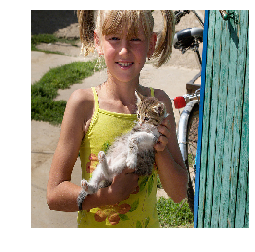

In [67]:
# YOUR CODE HERE

IMAGE_DATA = 'val2014'

# Load models
image_model = load_model(os.path.join(MODEL_PATH,'image_model.h5'))
caption_model = load_model(os.path.join(MODEL_PATH,'caption_model.h5'))

# Load reps
caption_representations = np.load('caption-rep.npy')
image_representations = np.load('image-rep.npy')

# choose one image_id from validation set
# use this id to get filepath of image
img_id = 2
original_caption = val_caps[val_caption_ids[img_id]].capitalize()
filepath_image = find_image_url(find_image_id(caption=original_caption))

# display original caption
print(original_caption)

# DO NOT CHANGE BELOW CODE
img = image.load_img(os.path.join(IMAGE_DATA,filepath_image), target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

In [0]:
# function to retrieve caption, given an image query

def get_caption(image_filename, n=10):   
    
    # YOUR CODE HERE
    # Get image features for the given url
    original_caption = find_image_caption(find_image_id(url=image_filename))
    counter = 0
    for i in val_data['caps']:
        i = str(i, 'utf-8')
        i = i.capitalize()
        if i == original_caption:
            break
            #return counter
        else:
            counter = counter + 1
    
    feature = val_data['ims'][floor(counter/5)]
    
    #image_model.predict()
    #Gen image rep for the image
    image_rep = image_model.predict(feature)
    #Compute scores
    scores = np.dot(caption_representations, image_representations.T).flatten()
    #Compute indices of n best captions
    indices = np.argpartition(scores, -n)[-n:]
    indices = indices[np.argsort(score[indices])]
    #Print them
    for i in [int(x) for x in reversed(indices)]:
        print(scores[i], val_data['ims'][i])

In [69]:
# DO NOT CHANGE BELOW CODE
get_caption(filepath_image)

ValueError: ignored

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===

### 8. Image Retrieval

In [0]:
# given text query, display retrieved image, similarity score, and its original caption 

def search_image(text_caption, n=10):
    
    # YOUR CODE HERE
    

Consider to use the following settings for image retrieval task.

* use real caption that is available in validation set as a query.
* use part of caption as query. For instance, instead of use the whole text sentence of the
caption, you may consider to use key phrase or combination of words that is included in
corresponding caption.

In [0]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
text1 = 

# DO NOT CHANGE BELOW CODE
search_image(text1)

In [0]:
# YOUR QUERY-2
text2 = 

# DO NOT CHANGE BELOW CODE
search_image(text2)

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===